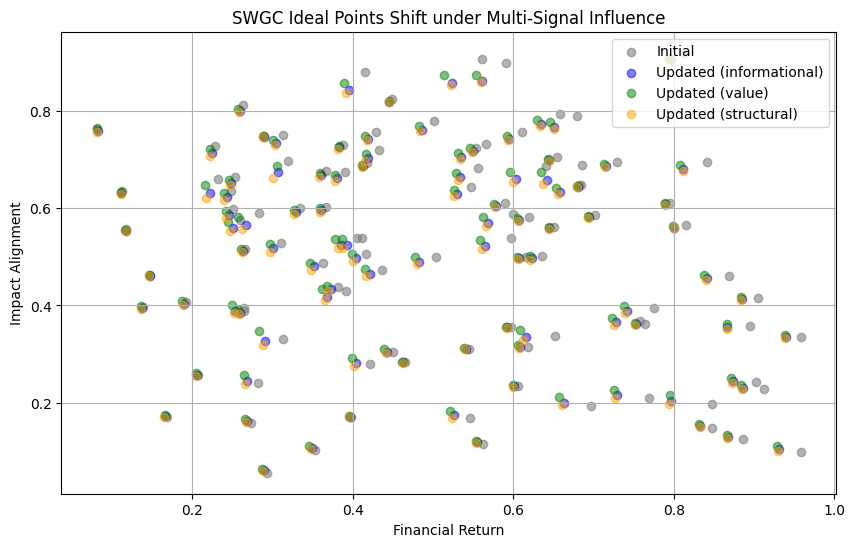

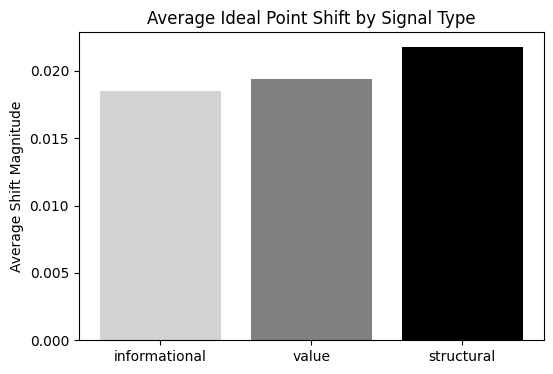

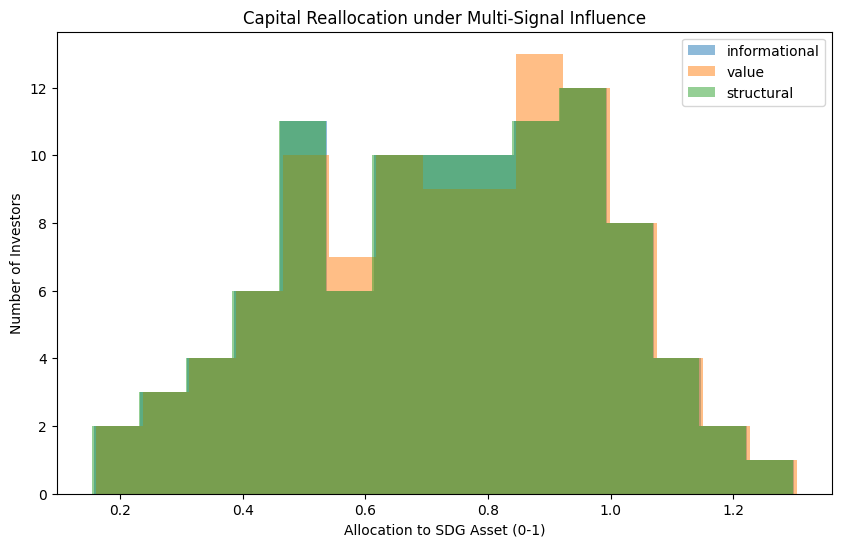

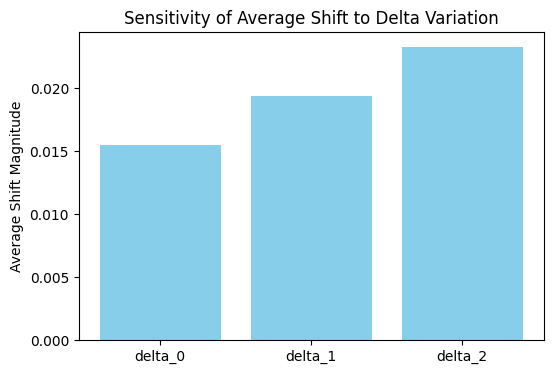

In [ ]:
# SWGC Simulation Notebook
# Google Colab / Python 3.13 compatible

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# 1. Simulation Parameters
# ----------------------------
n_agents = 100
np.random.seed(42)

# Initialize agent characteristics
ideal_points = np.random.beta(a=2, b=2, size=(n_agents, 2))  # [return, impact]
delta = np.random.uniform(0.4, 0.9, n_agents)  # Sensitivity to signal
eta = np.random.uniform(0.01, 0.1, n_agents)   # Openness to switch
tau = np.random.uniform(0.4, 0.6, n_agents)    # Switching threshold
k = np.random.uniform(3, 7, n_agents)          # Sensitivity steepness

# Signals
signals = {
    "informational": np.array([0.1, 0.3]),
    "value": np.array([0.0, 0.5]),
    "structural": np.array([0.05, 0.2])
}

# ----------------------------
# 2. SWGC Update Function
# ----------------------------
def update_ideal_point(current, signal, delta_i, eta_i, tau_i, k_i):
    diff = signal - current
    magnitude = eta_i * (1 / (1 + np.exp(-k_i*(np.linalg.norm(diff) - tau_i))))
    updated = current + delta_i * magnitude * (diff / (np.linalg.norm(diff) + 1e-6))
    return updated

# ----------------------------
# 3. Run Simulation
# ----------------------------
# Store results
results = {}
for sig_name, sig_vector in signals.items():
    updated_points = ideal_points.copy()
    for i in range(n_agents):
        updated_points[i] = update_ideal_point(
            updated_points[i], sig_vector, delta[i], eta[i], tau[i], k[i]
        )
    results[sig_name] = updated_points

# ----------------------------
# 4. Plot Initial vs Updated Points (all signals combined)
# ----------------------------
plt.figure(figsize=(10,6))
plt.scatter(ideal_points[:,0], ideal_points[:,1], c='grey', alpha=0.6, label='Initial')

colors = {'informational':'blue','value':'green','structural':'orange'}
for sig_name, points in results.items():
    plt.scatter(points[:,0], points[:,1], c=colors[sig_name], alpha=0.5, label=f'Updated ({sig_name})')

plt.xlabel('Financial Return')
plt.ylabel('Impact Alignment')
plt.title('SWGC Ideal Points Shift under Multi-Signal Influence')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 5. Average Shift Magnitude by Signal
# ----------------------------
avg_shifts = {sig: np.mean(np.linalg.norm(results[sig] - ideal_points, axis=1)) for sig in signals}
plt.figure(figsize=(6,4))
plt.bar(avg_shifts.keys(), avg_shifts.values(), color=['lightgrey','grey','black'])
plt.ylabel('Average Shift Magnitude')
plt.title('Average Ideal Point Shift by Signal Type')
plt.show()

# ----------------------------
# 6. Capital Reallocation Simulation
# ----------------------------
# SDG Asset Profile
sdg_asset = np.array([0.2, 0.8])

allocations = {}
for sig_name, points in results.items():
    # Project updated ideal points onto SDG asset vector
    allocations[sig_name] = np.dot(points, sdg_asset) / np.linalg.norm(sdg_asset)**2

# Plot histogram of allocations
plt.figure(figsize=(10,6))
for sig_name, alloc in allocations.items():
    plt.hist(alloc, bins=15, alpha=0.5, label=sig_name)
plt.xlabel('Allocation to SDG Asset (0-1)')
plt.ylabel('Number of Investors')
plt.title('Capital Reallocation under Multi-Signal Influence')
plt.legend()
plt.show()

# ----------------------------
# 7. Simple Sensitivity Check
# ----------------------------
# Vary delta ±20% and recompute average shifts
delta_variations = [delta*0.8, delta, delta*1.2]
sensitivity_results = {}
for idx, del_var in enumerate(delta_variations):
    updated_points_var = ideal_points.copy()
    for i in range(n_agents):
        updated_points_var[i] = update_ideal_point(
            updated_points_var[i], signals['value'], del_var[i], eta[i], tau[i], k[i]
        )
    sensitivity_results[f'delta_{idx}'] = np.mean(np.linalg.norm(updated_points_var - ideal_points, axis=1))

plt.figure(figsize=(6,4))
plt.bar(sensitivity_results.keys(), sensitivity_results.values(), color='skyblue')
plt.ylabel('Average Shift Magnitude')
plt.title('Sensitivity of Average Shift to Delta Variation')
plt.show()


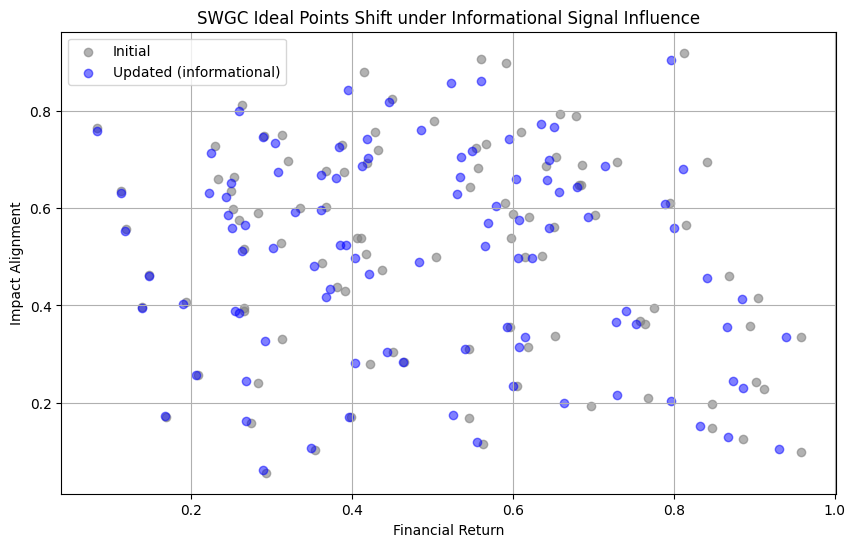

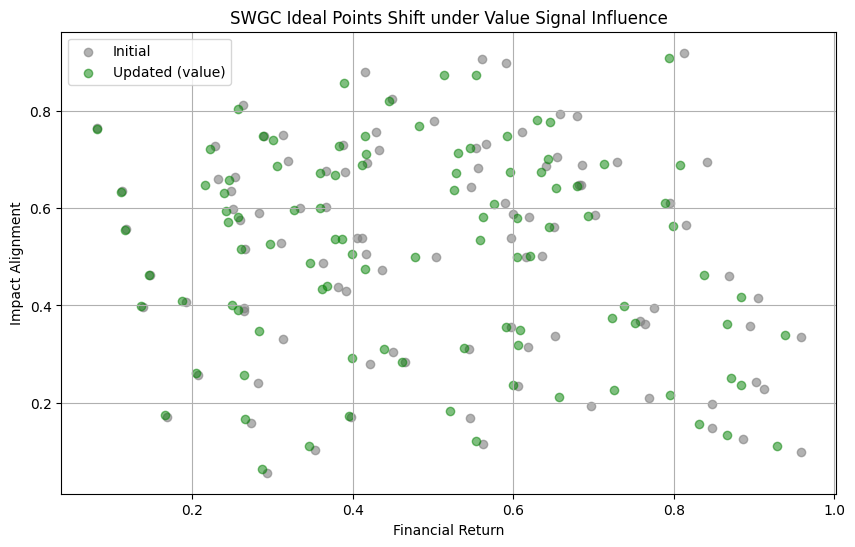

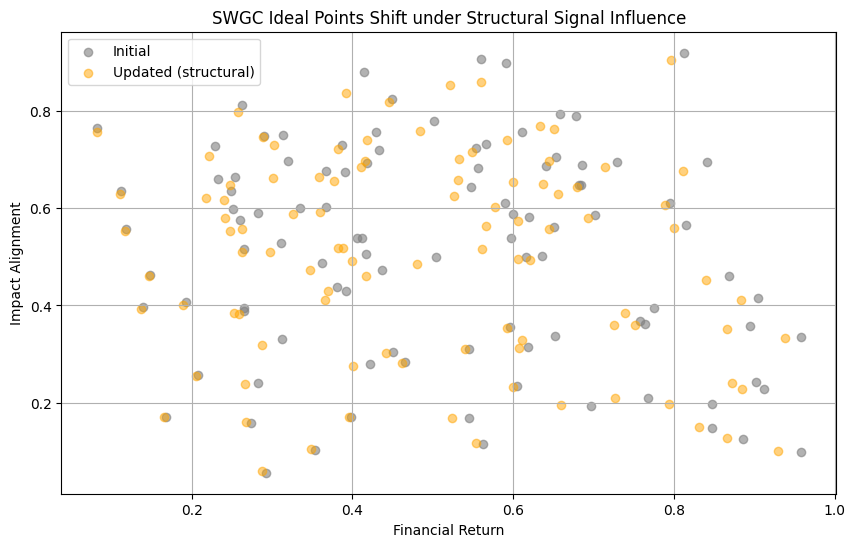

In [ ]:
colors = {'informational':'blue','value':'green','structural':'orange'}

for sig_name, points in results.items():
    plt.figure(figsize=(10,6))
    plt.scatter(ideal_points[:,0], ideal_points[:,1], c='grey', alpha=0.6, label='Initial')
    plt.scatter(points[:,0], points[:,1], c=colors[sig_name], alpha=0.5, label=f'Updated ({sig_name})')
    plt.xlabel('Financial Return')
    plt.ylabel('Impact Alignment')
    plt.title(f'SWGC Ideal Points Shift under {sig_name.capitalize()} Signal Influence')
    plt.legend()
    plt.grid(True)
    plt.show()

NameError: name 'ideal_points' is not defined

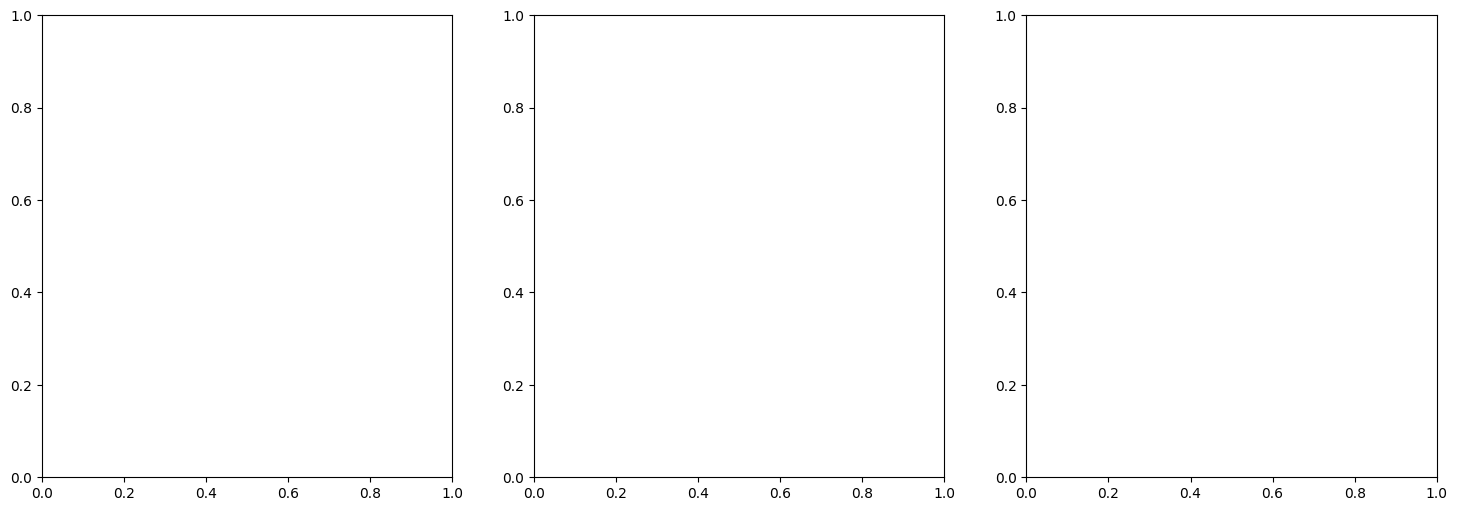

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy as it's used for array creation in signals

colors = {'informational':'blue','value':'green','structural':'orange'}

# Re-defining signals here to ensure it's available
signals = {
    "informational": np.array([0.1, 0.3]),
    "value": np.array([0.0, 0.5]),
    "structural": np.array([0.05, 0.2])
}

fig, axs = plt.subplots(1, 3, figsize=(18,6))

for ax, sig_name in zip(axs, signals.keys()):
    ax.scatter(ideal_points[:,0], ideal_points[:,1], c='grey', alpha=0.6, label='Initial')
    ax.scatter(results[sig_name][:,0], results[sig_name][:,1], c=colors[sig_name], alpha=0.5, label=f'Updated ({sig_name})')
    ax.set_xlabel('Financial Return')
    ax.set_ylabel('Impact Alignment')
    ax.set_title(f'Signal: {sig_name.capitalize()}')
    ax.legend()
    ax.grid(True)

plt.suptitle('SWGC Ideal Points Shift under Multi-Signal Influence (Separate Panels)')
plt.tight_layout()
plt.show()

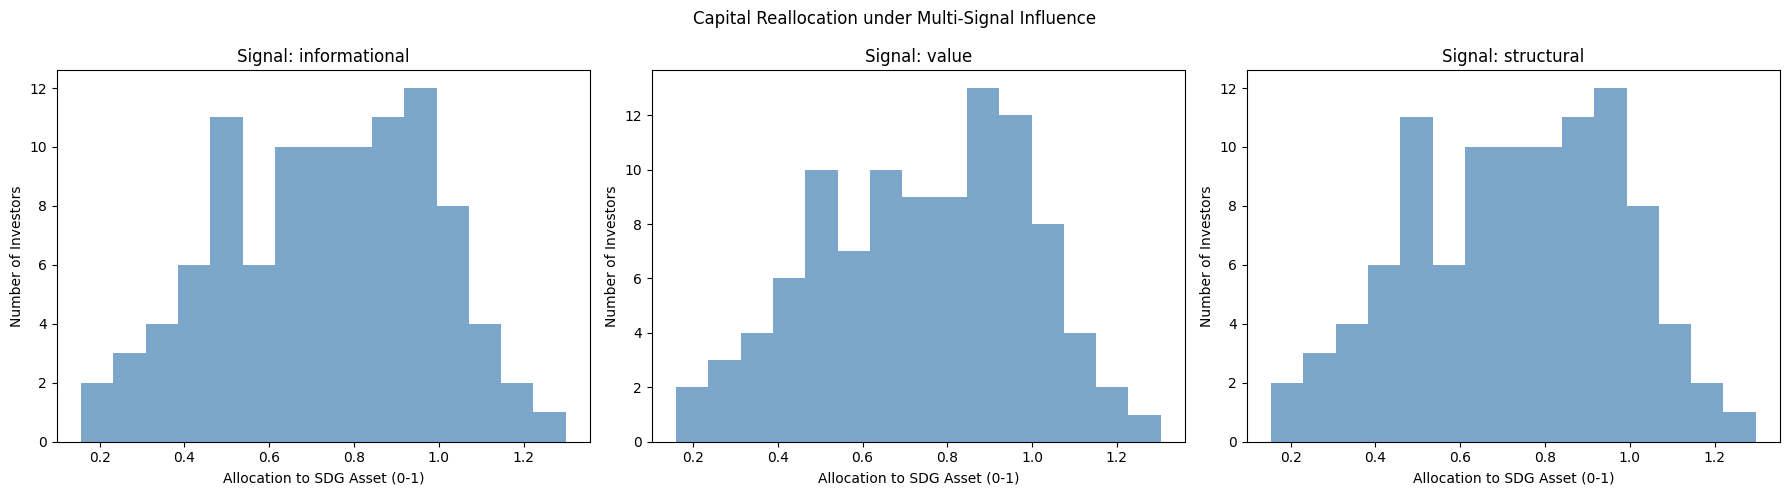

In [ ]:
# ----------------------------
# 6. Capital Reallocation Simulation (Figure 2.6 style)
# ----------------------------
sdg_asset = np.array([0.2, 0.8])
allocations = {sig: np.dot(results[sig], sdg_asset) / np.linalg.norm(sdg_asset)**2 for sig in signals}

fig, axs = plt.subplots(1, 3, figsize=(18,5))
for ax, sig_name in zip(axs, signals.keys()):
    ax.hist(allocations[sig_name], bins=15, alpha=0.7, color='steelblue')
    ax.set_xlabel('Allocation to SDG Asset (0-1)')
    ax.set_ylabel('Number of Investors')
    ax.set_title(f'Signal: {sig_name}')
plt.suptitle('Capital Reallocation under Multi-Signal Influence')
plt.tight_layout()
plt.show()

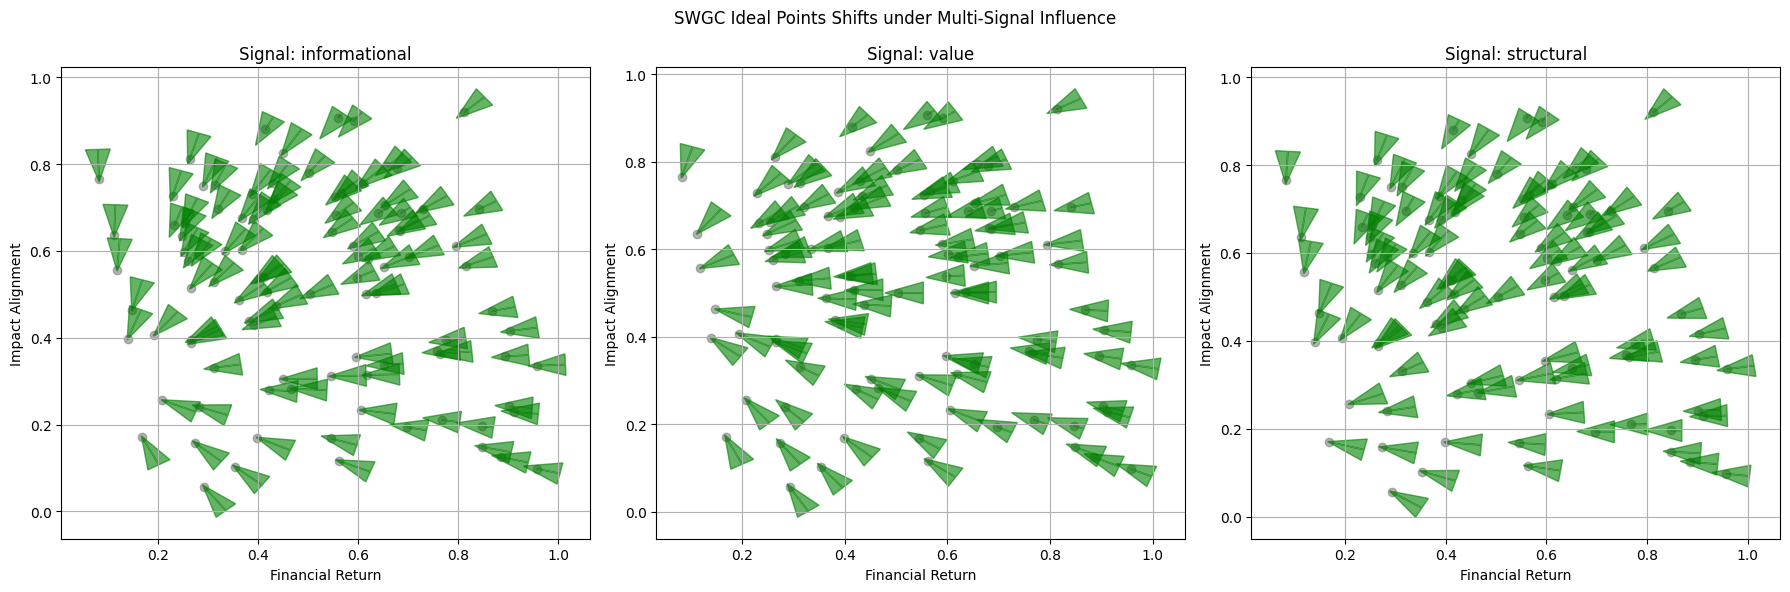

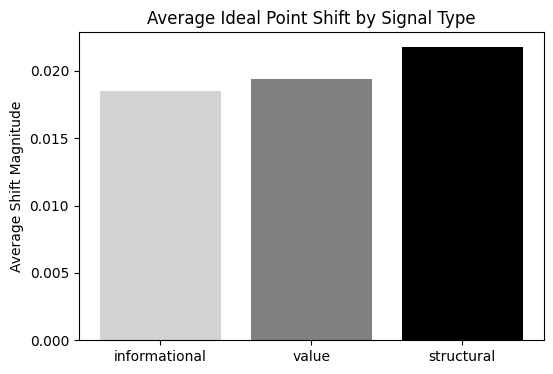

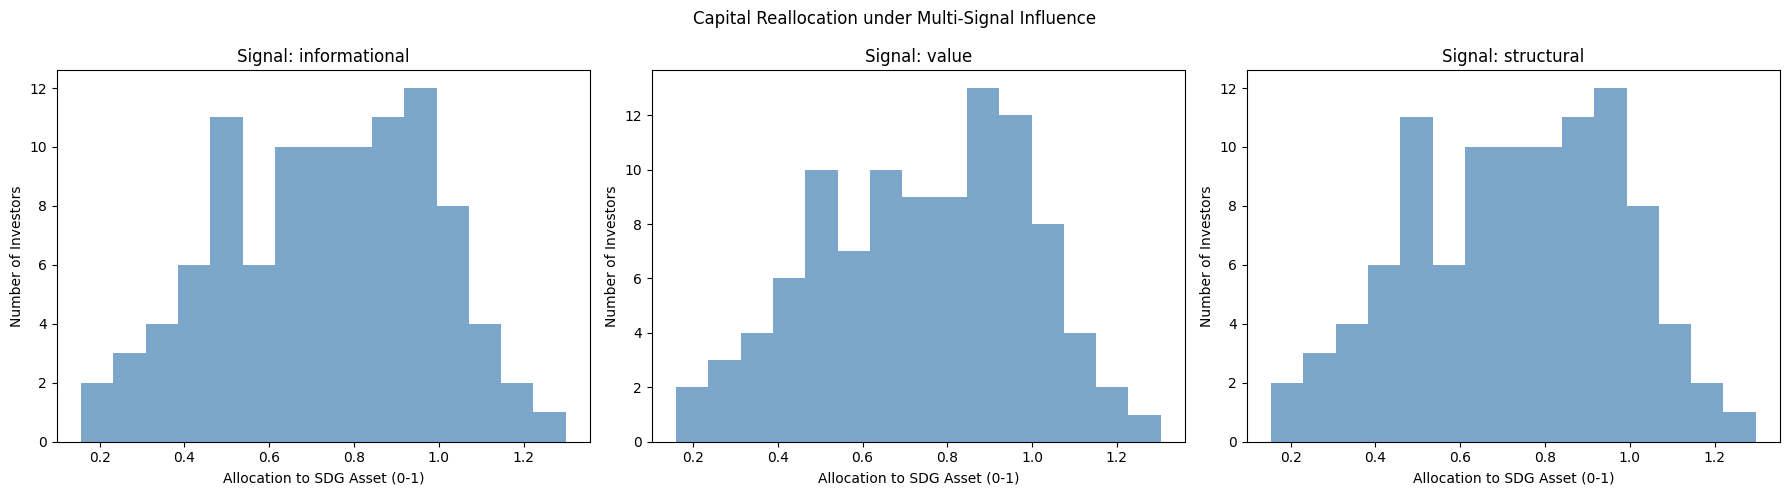

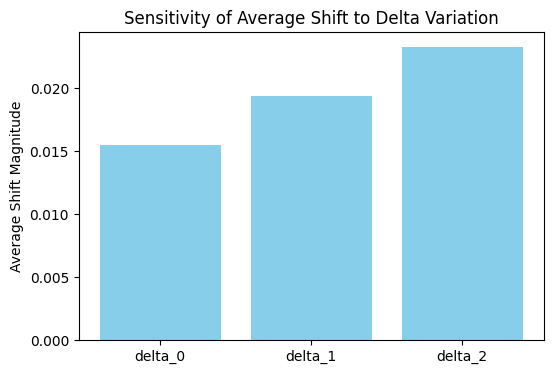

In [ ]:
# SWGC Simulation with Directional Arrows and Multi-panel Plots
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Simulation Parameters
# ----------------------------
n_agents = 100
np.random.seed(42)

# Initialize agent characteristics
ideal_points = np.random.beta(a=2, b=2, size=(n_agents, 2))  # [return, impact]
delta = np.random.uniform(0.4, 0.9, n_agents)
eta = np.random.uniform(0.01, 0.1, n_agents)
tau = np.random.uniform(0.4, 0.6, n_agents)
k = np.random.uniform(3, 7, n_agents)

# Signals
signals = {
    "informational": np.array([0.1, 0.3]),
    "value": np.array([0.0, 0.5]),
    "structural": np.array([0.05, 0.2])
}

# ----------------------------
# 2. SWGC Update Function
# ----------------------------
def update_ideal_point(current, signal, delta_i, eta_i, tau_i, k_i):
    diff = signal - current
    magnitude = eta_i * (1 / (1 + np.exp(-k_i*(np.linalg.norm(diff) - tau_i))))
    updated = current + delta_i * magnitude * (diff / (np.linalg.norm(diff) + 1e-6))
    return updated

# ----------------------------
# 3. Run Simulation and store shifts
# ----------------------------
results = {}
shifts = {}
for sig_name, sig_vector in signals.items():
    updated_points = ideal_points.copy()
    agent_shifts = np.zeros_like(ideal_points)
    for i in range(n_agents):
        updated_points[i] = update_ideal_point(
            updated_points[i], sig_vector, delta[i], eta[i], tau[i], k[i]
        )
        agent_shifts[i] = updated_points[i] - ideal_points[i]
    results[sig_name] = updated_points
    shifts[sig_name] = agent_shifts

# ----------------------------
# 4. Multi-panel directional plots (Figure 2.4 style)
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(18,6))
for ax, sig_name in zip(axs, signals.keys()):
    ax.scatter(ideal_points[:,0], ideal_points[:,1], color='grey', alpha=0.6, label='Initial')
    for i in range(n_agents):
        ax.arrow(ideal_points[i,0], ideal_points[i,1],
                 shifts[sig_name][i,0], shifts[sig_name][i,1],
                 color='green', alpha=0.6, head_width=0.05, length_includes_head=True)
    ax.set_title(f'Signal: {sig_name}')
    ax.set_xlabel('Financial Return')
    ax.set_ylabel('Impact Alignment')
    ax.grid(True)
plt.suptitle('SWGC Ideal Points Shifts under Multi-Signal Influence')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Average Shift Magnitude by Signal (Figure 2.5 style)
# ----------------------------
avg_shifts = {sig: np.mean(np.linalg.norm(shifts[sig], axis=1)) for sig in signals}
plt.figure(figsize=(6,4))
plt.bar(avg_shifts.keys(), avg_shifts.values(), color=['lightgrey','grey','black'])
plt.ylabel('Average Shift Magnitude')
plt.title('Average Ideal Point Shift by Signal Type')
plt.show()

# ----------------------------
# 6. Capital Reallocation Simulation (Figure 2.6 style)
# ----------------------------
sdg_asset = np.array([0.2, 0.8])
allocations = {sig: np.dot(results[sig], sdg_asset) / np.linalg.norm(sdg_asset)**2 for sig in signals}

fig, axs = plt.subplots(1, 3, figsize=(18,5))
for ax, sig_name in zip(axs, signals.keys()):
    ax.hist(allocations[sig_name], bins=15, alpha=0.7, color='steelblue')
    ax.set_xlabel('Allocation to SDG Asset (0-1)')
    ax.set_ylabel('Number of Investors')
    ax.set_title(f'Signal: {sig_name}')
plt.suptitle('Capital Reallocation under Multi-Signal Influence')
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Sensitivity Check (delta ±20%) with Figure
# ----------------------------
delta_variations = [delta*0.8, delta, delta*1.2]
sensitivity_results = {}
for idx, del_var in enumerate(delta_variations):
    updated_points_var = ideal_points.copy()
    for i in range(n_agents):
        updated_points_var[i] = update_ideal_point(
            updated_points_var[i], signals['value'], del_var[i], eta[i], tau[i], k[i]
        )
    sensitivity_results[f'delta_{idx}'] = np.mean(np.linalg.norm(updated_points_var - ideal_points, axis=1))

plt.figure(figsize=(6,4))
plt.bar(sensitivity_results.keys(), sensitivity_results.values(), color='skyblue')
plt.ylabel('Average Shift Magnitude')
plt.title('Sensitivity of Average Shift to Delta Variation')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# -----------------------------
# 1. Parameter Space
# -----------------------------
N = 100  # number of agents
eps = 1e-6

param_grid = {
    "eta":   [0.01, 0.1],
    "delta": [0.4, 0.9],
    "tau":   [0.4, 0.6],
    "k":     [3, 7],
    "I":     [0.1, 0.3],
    "V":     [0.0, 0.5],
    "St":    [0.05, 0.2]
}

# SDG asset profile (return, impact)
SDG_vector = np.array([0.2, 0.8])


# -----------------------------
# 2. Helper Functions
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def update_ideal_point(x_i, delta_i, eta_i, k_i, tau_i, d_signal):
    """Implements Eq. (2.23)."""
    norm_d = np.linalg.norm(d_signal)
    M_i = eta_i * sigmoid(k_i * (norm_d - tau_i))

    d_hat = d_signal / (norm_d + eps)

    x_new = x_i + delta_i * M_i * d_hat
    return np.clip(x_new, 0, 1)


def compute_d_signal(target, current):
    return target - current


def allocate_capital(x_new, A=1.0):
    return float(np.dot(x_new, SDG_vector)) * A


# -----------------------------
# 3. Simulation Function
# -----------------------------
def run_simulation(signal_type, signal_strength, params):
    """Runs one pass for one signal type and parameter configuration."""

    # Generate heterogeneous agents
    x = np.random.beta(2, 5, size=(N, 2))       # ideal points
    eta_i  = np.random.uniform(*params["eta"], N)
    delta_i= np.random.uniform(*params["delta"], N)
    tau_i  = np.random.uniform(*params["tau"], N)
    k_i    = np.random.uniform(*params["k"], N)

    # Target vector for the signal (stylized)
    if signal_type == "I":      target = np.array([0.5, 0.5])
    elif signal_type == "V":    target = np.array([0.2, 0.8])
    elif signal_type == "St":   target = np.array([0.7, 0.3])
    else:                       raise ValueError("Unknown signal")

    updated_positions = []
    allocations = []

    for j in range(N):
        d_signal = compute_d_signal(target, x[j])
        x_new = update_ideal_point(x[j], delta_i[j], eta_i[j], k_i[j], tau_i[j], d_signal)

        updated_positions.append(x_new)
        allocations.append(allocate_capital(x_new))

    updated_positions = np.array(updated_positions)

    avg_shift = np.mean(np.linalg.norm(updated_positions - x, axis=1))
    avg_allocation = np.mean(allocations)

    return avg_shift, avg_allocation


# -----------------------------
# 4. Sensitivity Sweep
# -----------------------------
def sensitivity_sweep():
    results = []
    signals = ["I", "V", "St"]

    for signal in signals:
        for delta_val in param_grid["delta"]:
            params = {
                "eta":   (0.01, 0.1),
                "delta": (delta_val, delta_val),  # ONLY vary delta here
                "tau":   (0.4, 0.6),
                "k":     (3, 7)
            }

            shift, alloc = run_simulation(signal, signal_strength=None, params=params)

            results.append({
                "Signal": signal,
                "Delta": delta_val,
                "Avg_Shift": shift,
                "Avg_Allocation": alloc
            })

    return pd.DataFrame(results)


# -----------------------------
# 5. Run and Export
# -----------------------------
if __name__ == "__main__":
    df = sensitivity_sweep()
    print(df)
    df.to_csv("sensitivity_results.csv", index=False)


  Signal  Delta  Avg_Shift  Avg_Allocation
0      I    0.4   0.007519        0.285209
1      I    0.9   0.016302        0.311242
2      V    0.4   0.013292        0.277993
3      V    0.9   0.029102        0.320644
4     St    0.4   0.009336        0.307432
5     St    0.9   0.021438        0.314218


Wrote LHS results to lhs_results.csv
Saved plot to lhs_results_delta.png


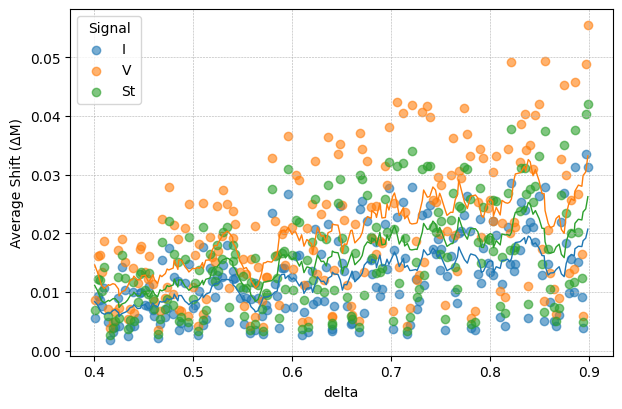

Done.


In [ ]:
import numpy as np
import pandas as pd
import math
import os
import itertools
import argparse
from typing import Dict, Any, List, Tuple

# Optional imports (SALib / joblib). We import lazily and handle absence gracefully.
try:
    from SALib.sample import saltelli, morris as salib_morris
    from SALib.analyze import sobol, morris as morris_analyze
    SALIB_AVAILABLE = True
except Exception:
    SALIB_AVAILABLE = False

try:
    from joblib import Parallel, delayed
    JOBLIB_AVAILABLE = True
except Exception:
    JOBLIB_AVAILABLE = False

import matplotlib.pyplot as plt

# -----------------------------
# 1. Model / Update Routine
# -----------------------------
N_AGENTS = 100
EPS = 1e-6
SDG_VECTOR = np.array([0.2, 0.8])  # asset profile: (return, impact)


def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1.0 / (1.0 + np.exp(-x))


def update_ideal_point(x_i: np.ndarray,
                       delta_i: float,
                       eta_i: float,
                       k_i: float,
                       tau_i: float,
                       d_signal: np.ndarray) -> np.ndarray:
    """
    Implements Eq. (2.23).
    x_i: (2,) current ideal point
    delta_i, eta_i, k_i, tau_i: scalars for this agent
    d_signal: (2,) direction vector (target - x_i)
    """
    norm_d = np.linalg.norm(d_signal)
    M_i = eta_i * sigmoid(k_i * (norm_d - tau_i))
    d_hat = d_signal / (norm_d + EPS)
    x_new = x_i + delta_i * M_i * d_hat
    return np.clip(x_new, 0.0, 1.0)


def allocate_capital(x_new: np.ndarray, A: float = 1.0) -> float:
    """Projection to SDG asset profile; returns proportion*capital allocated to SDG vector."""
    return float(np.dot(x_new, SDG_VECTOR)) * A


# -----------------------------
# 2. Single-run experiment
# -----------------------------
def generate_population(N: int,
                        beta_params: Tuple[float, float] = (2, 5),
                        seed: int | None = None) -> np.ndarray:
    """Return N x 2 array of ideal points drawn from Beta(alpha,beta)."""
    if seed is not None:
        np.random.seed(seed)
    alpha, beta = beta_params
    return np.random.beta(alpha, beta, size=(N, 2))


def run_one_experiment(params: Dict[str, Any],
                       signal: str = "V",
                       pop: np.ndarray | None = None,
                       seed: int | None = None) -> Dict[str, float]:
    """
    Run the model for N_AGENTS once with parameter specification in params.
    params keys (scalars or tuples of per-agent draws):
      - eta_range: (min,max) OR ndarray (N,)
      - delta_range
      - tau_range
      - k_range
      - signal_strengths: dict with 'I','V','St' optional (we pass via signal to create target)
    Returns:
      - avg_shift: mean ||x_new - x||
      - avg_allocation: mean allocation to SDG assets
    """
    if seed is not None:
        np.random.seed(seed)

    # create population if not provided
    if pop is None:
        pop = generate_population(N_AGENTS, beta_params=params.get("beta_params", (2, 5)))

    # Draw per-agent parameters uniformly from range tuples if given as tuples
    def draw_param(name: str):
        val = params.get(name)
        if isinstance(val, tuple) and len(val) == 2:
            return np.random.uniform(val[0], val[1], size=N_AGENTS)
        elif np.ndim(val) == 1 and len(val) == N_AGENTS:
            return np.asarray(val)
        else:
            # scalar -> same for all agents
            return np.full(N_AGENTS, float(val))

    eta_i = draw_param("eta")
    delta_i = draw_param("delta")
    tau_i = draw_param("tau")
    k_i = draw_param("k")

    # Signal target definitions (stylized) - adapt as needed
    if signal == "I":
        target_vector = np.array([0.5, 0.5])
    elif signal == "V":
        target_vector = np.array([0.2, 0.8])
    elif signal == "St":
        target_vector = np.array([0.7, 0.3])
    else:
        raise ValueError("signal must be one of 'I','V','St'")

    updated_positions = np.zeros_like(pop)
    allocations = np.zeros(N_AGENTS)

    for j in range(N_AGENTS):
        d_signal = target_vector - pop[j]
        x_new = update_ideal_point(pop[j], float(delta_i[j]), float(eta_i[j]), float(k_i[j]), float(tau_i[j]), d_signal)
        updated_positions[j] = x_new
        allocations[j] = allocate_capital(x_new, A=params.get("A", 1.0))

    avg_shift = float(np.mean(np.linalg.norm(updated_positions - pop, axis=1)))
    avg_allocation = float(np.mean(allocations))

    return {"avg_shift": avg_shift, "avg_allocation": avg_allocation}


# -----------------------------
# 3. Sampling utilities (LHS)
# -----------------------------
def latin_hypercube_sample(n_samples: int, param_ranges: Dict[str, Tuple[float, float]], seed: int | None = None) -> List[Dict[str, float]]:
    """
    n_samples rows of parameters using simple LHS.
    param_ranges: dict {name: (min,max)}
    Returns list of dicts with sampled parameter values (scalars).
    """
    if seed is not None:
        np.random.seed(seed)

    k = len(param_ranges)
    names = list(param_ranges.keys())
    # Create LHS matrix in [0,1]
    cut = np.linspace(0.0, 1.0, n_samples + 1)
    u = np.random.rand(n_samples, k)
    lhs = np.zeros_like(u)
    for i in range(k):
        pts = cut[:-1] + u[:, i] * (1.0 / n_samples)
        np.random.shuffle(pts)
        lhs[:, i] = pts

    samples = []
    for i in range(n_samples):
        sample = {}
        for j, name in enumerate(names):
            lo, hi = param_ranges[name]
            sample[name] = lo + lhs[i, j] * (hi - lo)
        samples.append(sample)
    return samples


# -----------------------------
# 4. Global sensitivity wrappers (SALib optional)
# -----------------------------
def run_sobol_analysis(model_func, problem: Dict[str, Any], sample_size: int = 1024, **kwargs):
    """
    Run Sobol analysis using SALib if available. model_func accepts param array of shape (n_params,)
    and returns scalar output of interest.
    """
    if not SALIB_AVAILABLE:
        raise RuntimeError("SALib is not available. Please pip install SALib to run Sobol.")
    # Saltelli sample
    param_values = saltelli.sample(problem, sample_size, calc_second_order=False)
    Y = np.zeros(len(param_values))
    for i, X in enumerate(param_values):
        Y[i] = model_func(X, **kwargs)
    Si = sobol.analyze(problem, Y, calc_second_order=False)
    return Si


def run_morris_analysis(model_func, problem: Dict[str, Any], num_trajectories: int = 100, **kwargs):
    if not SALIB_AVAILABLE:
        raise RuntimeError("SALib is not available. Please pip install SALib to run Morris.")
    param_values = salib_morris.sample(problem, N=num_trajectories, num_levels=8, grid_jump=2)
    Y = np.zeros(param_values.shape[0])
    for i, X in enumerate(param_values):
        Y[i] = model_func(X, **kwargs)
    Si = morris_analyze.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=False)
    return Si


# -----------------------------
# 5. Batch experiment orchestration
# -----------------------------
def batch_sensitivity_lhs(n_samples: int,
                          param_ranges: Dict[str, Tuple[float, float]],
                          signals: List[str] = ["I", "V", "St"],
                          seed: int | None = None,
                          parallel: bool = False,
                          out_csv: str = "lhs_results.csv"):
    """
    Run LHS-driven experiments across signals and save results.
    param_ranges: includes keys 'eta','delta','tau','k' as ranges
    """
    samples = latin_hypercube_sample(n_samples, param_ranges, seed=seed)
    rows = []

    # Optionally generate a fixed population to hold initial heterogeneity constant across runs
    fixed_pop = generate_population(N_AGENTS, beta_params=(2, 5), seed=seed)

    def run_for_sample(i, sample):
        for s in signals:
            params = {
                "eta": (sample["eta"], sample["eta"]),
                "delta": (sample["delta"], sample["delta"]),
                "tau": (sample["tau"], sample["tau"]),
                "k": (sample["k"], sample["k"]),
                "A": 1.0,
                "beta_params": (2, 5)
            }
            res = run_one_experiment(params, signal=s, pop=fixed_pop, seed=None)
            row = {"sample_id": i, "signal": s}
            row.update(sample)
            row.update(res)
            rows.append(row)

    if parallel and JOBLIB_AVAILABLE:
        Parallel(n_jobs=-1)(delayed(run_for_sample)(i, sample) for i, sample in enumerate(samples))
    else:
        for i, sample in enumerate(samples):
            run_for_sample(i, sample)

    df = pd.DataFrame(rows)
    df.to_csv(out_csv, index=False)
    print(f"Wrote LHS results to {out_csv}")
    return df


# -----------------------------
# 6. Convenience plotting
# -----------------------------
def plot_response_vs_param(df: pd.DataFrame, param: str, output: str | None = None):
    """
    Simple scatter + smoothing for Avg_Shift vs param for each signal.
    """
    fig, ax = plt.subplots(figsize=(7, 4.5))
    for sig in df["signal"].unique():
        sub = df[df["signal"] == sig]
        ax.scatter(sub[param], sub["avg_shift"], label=sig, alpha=0.6)
        # A simple running mean smoothing
        order = np.argsort(sub[param])
        x_sorted = sub[param].values[order]
        y_sorted = sub["avg_shift"].values[order]
        window = max(3, len(x_sorted) // 20)
        y_smooth = pd.Series(y_sorted).rolling(window=window, min_periods=1, center=True).mean()
        ax.plot(x_sorted, y_smooth, linewidth=1)
    ax.set_xlabel(param)
    ax.set_ylabel("Average Shift (ΔM)")
    ax.legend(title="Signal")
    ax.grid(True, linestyle="--", linewidth=0.4)
    if output:
        fig.savefig(output, dpi=200, bbox_inches="tight")
        print(f"Saved plot to {output}")
    plt.show()


# -----------------------------
# 7. Example model wrapper for SALib (if used)
# -----------------------------
def model_wrapper_for_salib(x: np.ndarray, fixed_args: Dict[str, Any]) -> float:
    """
    x: parameter vector in order [eta, delta, tau, k]
    Returns a scalar of interest (e.g., avg_shift for signal 'V')
    """
    params = {
        "eta": (x[0], x[0]),
        "delta": (x[1], x[1]),
        "tau": (x[2], x[2]),
        "k": (x[3], x[3]),
        "A": fixed_args.get("A", 1.0)
    }
    res = run_one_experiment(params, signal=fixed_args.get("signal", "V"), pop=fixed_args.get("pop", None), seed=None)
    return res[fixed_args.get("outcome", "avg_shift")]


# -----------------------------
# 8. CLI / main usage
# -----------------------------
def parse_args(args=None):
    p = argparse.ArgumentParser(description="Multi-parameter sensitivity for SWGC–ABM")
    p.add_argument("--lhs_samples", type=int, default=200, help="Number of LHS samples")
    p.add_argument("--out", type=str, default="lhs_results.csv", help="Output CSV filename")
    p.add_argument("--parallel", action="store_true", help="Use joblib parallelization if available")
    p.add_argument("--plot_param", type=str, default="delta", help="Parameter to plot against avg_shift")
    p.add_argument("--sobol", action="store_true", help="Run Sobol (requires SALib)")
    p.add_argument("--morris", action="store_true", help="Run Morris (requires SALib)")
    return p.parse_args(args=args)


def main():
    # In a notebook environment, sys.argv might contain unexpected arguments.
    # We can explicitly pass an empty list or specific arguments if needed.
    # For this case, we assume no command-line arguments are intended for the notebook run.
    import sys
    if 'ipykernel' in sys.modules:
        args = parse_args([]) # Pass an empty list to parse_args() when in a notebook
    else:
        args = parse_args() # For command-line execution

    # PARAM RANGES (adjust for your experiments)
    param_ranges = {
        "eta": (0.01, 0.1),
        "delta": (0.4, 0.9),
        "tau": (0.4, 0.6),
        "k": (3.0, 7.0)
    }

    # Run LHS sweep
    df = batch_sensitivity_lhs(n_samples=args.lhs_samples,
                               param_ranges=param_ranges,
                               signals=["I", "V", "St"],
                               seed=123,
                               parallel=args.parallel,
                               out_csv=args.out)

    # Plot basic response
    plot_response_vs_param(df, args.plot_param, output=args.out.replace(".csv", f"_{args.plot_param}.png"))

    # Optional SALib analyses
    if args.sobol or args.morris:
        if not SALIB_AVAILABLE:
            print("SALib not installed. Install via 'pip install SALib' to run Sobol/Morris.")
        else:
            problem = {
                "num_vars": 4,
                "names": ["eta", "delta", "tau", "k"],
                "bounds": [list(param_ranges[n]) for n in ["eta", "delta", "tau", "k"]]
            }
            fixed_args = {"signal": "V", "outcome": "avg_shift", "A": 1.0}
            if args.sobol:
                print("Running Sobol analysis (this may take time)...")
                Si = run_sobol_analysis(model_wrapper_for_salib, problem, sample_size=512, fixed_args=fixed_args)
                print("Sobol indices (first order):", Si.get("S1"))
            if args.morris:
                print("Running Morris analysis (this may take time)...")
                Si_m = run_morris_analysis(model_wrapper_for_salib, problem, num_trajectories=100, fixed_args=fixed_args)
                print("Morris mu*:", Si_m.get("mu_star"))

    print("Done.")


if __name__ == "__main__":
    main()


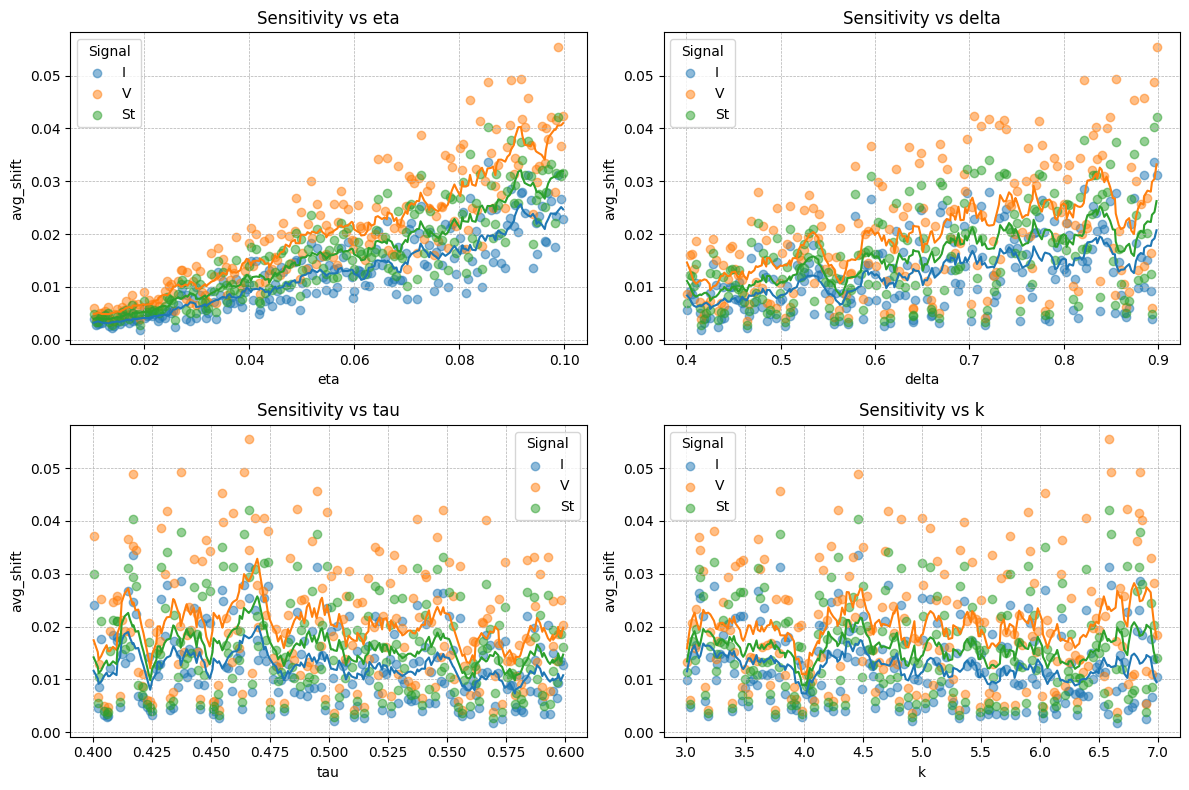

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# -----------------------------
# 1. Model / update routine
# -----------------------------
N_AGENTS = 100
EPS = 1e-6
SDG_VECTOR = np.array([0.2, 0.8])  # SDG asset vector


def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1.0 / (1.0 + np.exp(-x))


def update_ideal_point(x_i, delta_i, eta_i, k_i, tau_i, d_signal):
    norm_d = np.linalg.norm(d_signal)
    M_i = eta_i * sigmoid(k_i * (norm_d - tau_i))
    d_hat = d_signal / (norm_d + EPS)
    x_new = x_i + delta_i * M_i * d_hat
    return np.clip(x_new, 0.0, 1.0)


def allocate_capital(x_new, A=1.0):
    return float(np.dot(x_new, SDG_VECTOR)) * A


# -----------------------------
# 2. Population generation
# -----------------------------
def generate_population(N, beta_params=(2, 5), seed=None):
    if seed is not None:
        np.random.seed(seed)
    alpha, beta = beta_params
    return np.random.beta(alpha, beta, size=(N, 2))


# -----------------------------
# 3. Single-run experiment
# -----------------------------
def run_one_experiment(params, signal="V", pop=None):
    if pop is None:
        pop = generate_population(N_AGENTS)

    # All agents get same scalar from LHS sample
    eta_i = np.full(N_AGENTS, params["eta"])
    delta_i = np.full(N_AGENTS, params["delta"])
    tau_i = np.full(N_AGENTS, params["tau"])
    k_i = np.full(N_AGENTS, params["k"])

    # Signal target vectors
    if signal == "I":
        target_vector = np.array([0.5, 0.5])
    elif signal == "V":
        target_vector = np.array([0.2, 0.8])
    elif signal == "St":
        target_vector = np.array([0.7, 0.3])
    else:
        raise ValueError("signal must be one of 'I','V','St'")

    updated_positions = np.zeros_like(pop)
    allocations = np.zeros(N_AGENTS)

    for j in range(N_AGENTS):
        d_signal = target_vector - pop[j]
        x_new = update_ideal_point(pop[j], delta_i[j], eta_i[j], k_i[j], tau_i[j], d_signal)
        updated_positions[j] = x_new
        allocations[j] = allocate_capital(x_new)

    avg_shift = float(np.mean(np.linalg.norm(updated_positions - pop, axis=1)))
    avg_allocation = float(np.mean(allocations))
    return {"avg_shift": avg_shift, "avg_allocation": avg_allocation}


# -----------------------------
# 4. Latin Hypercube Sampling
# -----------------------------
def latin_hypercube_sample(n_samples, param_ranges, seed=None):
    if seed is not None:
        np.random.seed(seed)
    k = len(param_ranges)
    names = list(param_ranges.keys())
    cut = np.linspace(0.0, 1.0, n_samples + 1)
    u = np.random.rand(n_samples, k)
    lhs = np.zeros_like(u)
    for i in range(k):
        pts = cut[:-1] + u[:, i] * (1.0 / n_samples)
        np.random.shuffle(pts)
        lhs[:, i] = pts

    samples = []
    for i in range(n_samples):
        sample = {}
        for j, name in enumerate(names):
            lo, hi = param_ranges[name]
            sample[name] = lo + lhs[i, j] * (hi - lo)
        samples.append(sample)
    return samples


# -----------------------------
# 5. Batch LHS sensitivity experiment
# -----------------------------
def batch_sensitivity_lhs(n_samples, param_ranges, signals=["I", "V", "St"], seed=None, parallel=False):
    samples = latin_hypercube_sample(n_samples, param_ranges, seed=seed)
    rows = []

    fixed_pop = generate_population(N_AGENTS, seed=seed)

    def run_for_sample(i, sample):
        for s in signals:
            res = run_one_experiment(sample, signal=s, pop=fixed_pop)
            row = {"sample_id": i, "signal": s}
            row.update(sample)
            row.update(res)
            rows.append(row)

    if parallel:
        Parallel(n_jobs=-1)(delayed(run_for_sample)(i, sample) for i, sample in enumerate(samples))
    else:
        for i, sample in enumerate(samples):
            run_for_sample(i, sample)

    df = pd.DataFrame(rows)
    return df


# -----------------------------
# 6. Side-by-side plotting
# -----------------------------
def plot_sensitivity_panels(df, params=["eta", "delta", "tau", "k"], outcome="avg_shift"):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for ax, param in zip(axes, params):
        for sig in df["signal"].unique():
            sub = df[df["signal"] == sig]
            ax.scatter(sub[param], sub[outcome], label=sig, alpha=0.5)
            # smooth trend line
            order = np.argsort(sub[param])
            x_sorted = sub[param].values[order]
            y_sorted = sub[outcome].values[order]
            window = max(3, len(x_sorted)//20)
            y_smooth = pd.Series(y_sorted).rolling(window=window, min_periods=1, center=True).mean()
            ax.plot(x_sorted, y_smooth, linewidth=1.5)
        ax.set_xlabel(param)
        ax.set_ylabel(outcome)
        ax.grid(True, linestyle="--", linewidth=0.5)
        ax.legend(title="Signal")
        ax.set_title(f"Sensitivity vs {param}")

    plt.tight_layout()
    plt.show()


# -----------------------------
# 7. Example usage
# -----------------------------
if __name__ == "__main__":
    param_ranges = {
        "eta": (0.01, 0.1),
        "delta": (0.4, 0.9),
        "tau": (0.4, 0.6),
        "k": (3.0, 7.0)
    }

    # Run LHS sweep
    df = batch_sensitivity_lhs(n_samples=200, param_ranges=param_ranges, seed=123, parallel=False)

    # Plot side-by-side panels
    plot_sensitivity_panels(df)


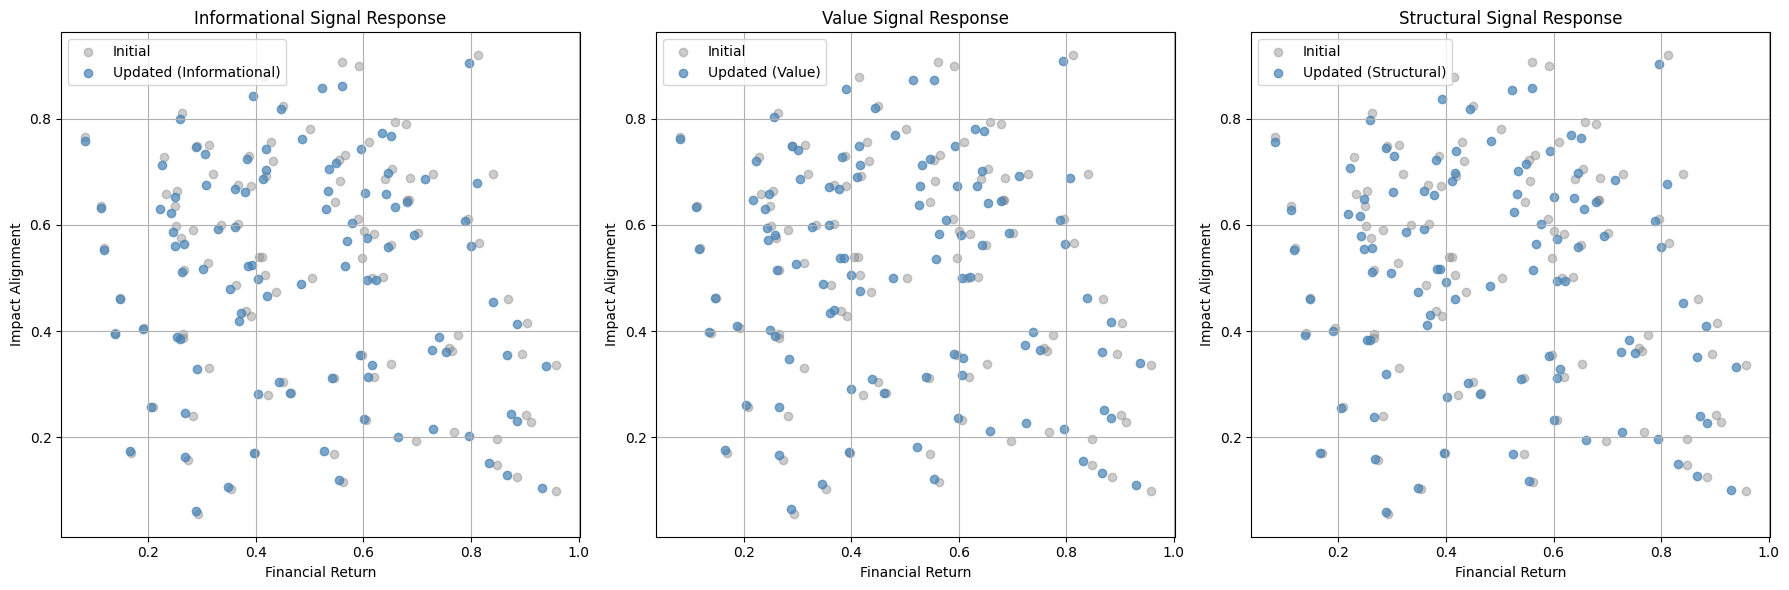

In [ ]:
# SWGC Simulation – Side-by-Side Scatter Plots
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Simulation Parameters
# ----------------------------
n_agents = 100
np.random.seed(42)

ideal_points = np.random.beta(a=2, b=2, size=(n_agents, 2))
delta = np.random.uniform(0.4, 0.9, n_agents)
eta = np.random.uniform(0.01, 0.1, n_agents)
tau = np.random.uniform(0.4, 0.6, n_agents)
k = np.random.uniform(3, 7, n_agents)

signals = {
    "Informational": np.array([0.1, 0.3]),
    "Value": np.array([0.0, 0.5]),
    "Structural": np.array([0.05, 0.2])
}

# ----------------------------
# 2. SWGC Update Function
# ----------------------------
def update_ideal_point(current, signal, delta_i, eta_i, tau_i, k_i):
    diff = signal - current
    magnitude = eta_i * (1 / (1 + np.exp(-k_i*(np.linalg.norm(diff) - tau_i))))
    updated = current + delta_i * magnitude * (diff / (np.linalg.norm(diff) + 1e-6))
    return updated

# ----------------------------
# 3. Run Simulation
# ----------------------------
results = {}
for sig_name, sig_vector in signals.items():
    updated_points = ideal_points.copy()
    for i in range(n_agents):
        updated_points[i] = update_ideal_point(
            updated_points[i], sig_vector, delta[i], eta[i], tau[i], k[i]
        )
    results[sig_name] = updated_points

# ----------------------------
# 4. Side-by-Side Scatter Plots
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, (sig_name, points) in enumerate(results.items()):
    axs[idx].scatter(ideal_points[:,0], ideal_points[:,1],
                     c='grey', alpha=0.4, label='Initial')
    axs[idx].scatter(points[:,0], points[:,1],
                     c='steelblue', alpha=0.7, label=f'Updated ({sig_name})')

    axs[idx].set_title(f"{sig_name} Signal Response")
    axs[idx].set_xlabel("Financial Return")
    axs[idx].set_ylabel("Impact Alignment")
    axs[idx].grid(True)
    axs[idx].legend()

plt.tight_layout()
plt.show()


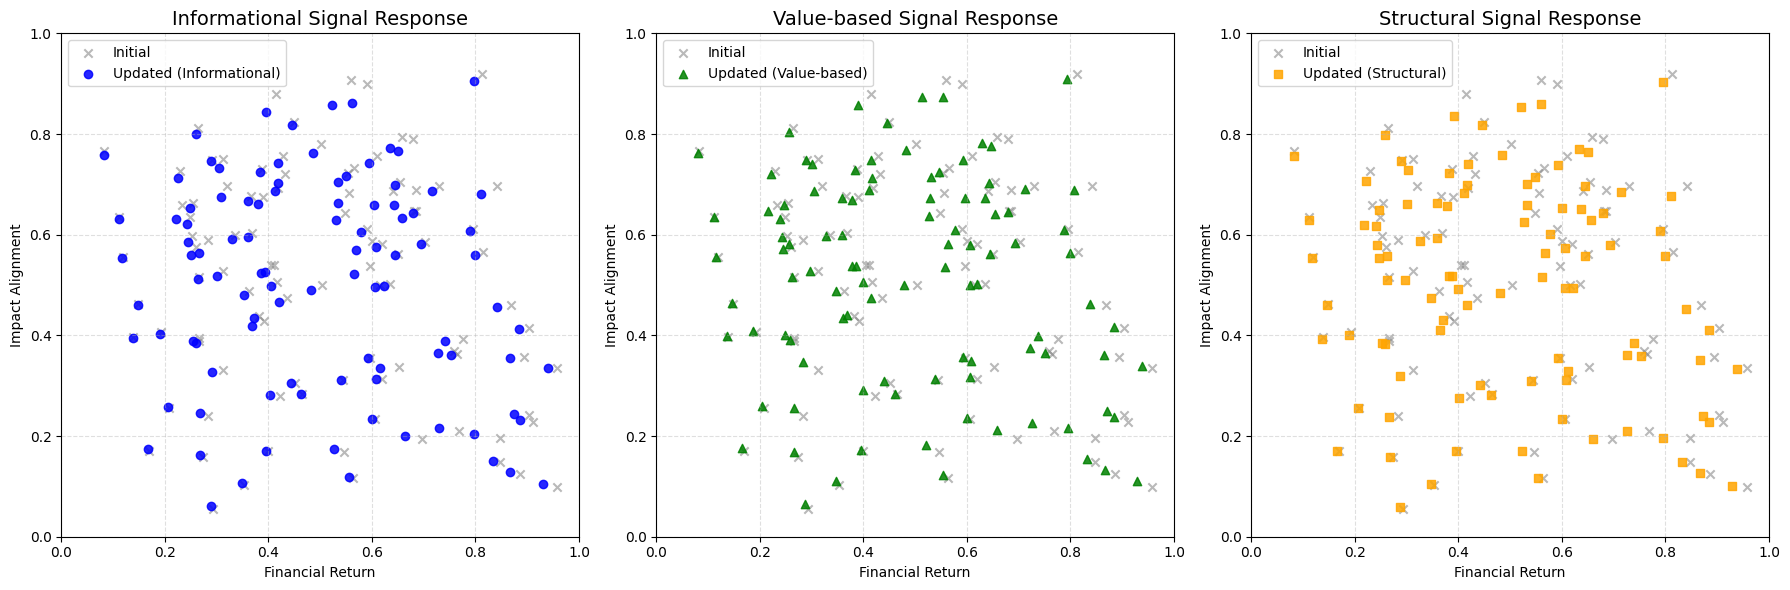

In [ ]:
# ===============================================
# SWGC Simulation — Three Side-by-Side Scatter Plots
# Distinct Colours + Marker Shapes (Option A)
# ===============================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Simulation Parameters
# ----------------------------
np.random.seed(42)
N = 100

# Initial ideal points: return, impact in [0,1]
ideal_points = np.random.beta(2, 2, size=(N, 2))

# Heterogeneous psychological parameters
delta = np.random.uniform(0.4, 0.9, N)
eta   = np.random.uniform(0.01, 0.1, N)
tau   = np.random.uniform(0.4, 0.6, N)
k     = np.random.uniform(3, 7, N)

# Signal vectors
signals = {
    "Informational": np.array([0.1, 0.3]),
    "Value-based":   np.array([0.0, 0.5]),
    "Structural":    np.array([0.05, 0.2])
}

# ----------------------------
# 2. SWGC Update Function
# ----------------------------
def update_ideal_point(current, signal, delta_i, eta_i, tau_i, k_i):
    """Implements SWGC directional update."""
    diff = signal - current
    magnitude = eta_i * (1 / (1 + np.exp(-k_i * (np.linalg.norm(diff) - tau_i))))
    updated = current + delta_i * magnitude * (diff / (np.linalg.norm(diff) + 1e-6))
    return np.clip(updated, 0, 1)

# ----------------------------
# 3. Run Simulation for Each Signal Type
# ----------------------------
results = {}
for sig_name, sig_vector in signals.items():
    updated_points = np.zeros_like(ideal_points)
    for i in range(N):
        updated_points[i] = update_ideal_point(
            ideal_points[i], sig_vector, delta[i], eta[i], tau[i], k[i]
        )
    results[sig_name] = updated_points

# ----------------------------
# 4. Plotting — Option A Marker/Colour Scheme
# ----------------------------

colors = {
    "Informational": "blue",
    "Value-based": "green",
    "Structural": "orange"
}

markers = {
    "Informational": "o",   # circle
    "Value-based": "^",     # triangle
    "Structural": "s"       # square
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (label, upd) in zip(axs, results.items()):
    # Initial points
    ax.scatter(ideal_points[:,0], ideal_points[:,1],
               marker="x", color="grey", alpha=0.55, label="Initial")

    # Updated points (distinct colour + shape)
    ax.scatter(upd[:,0], upd[:,1],
               marker=markers[label], color=colors[label], alpha=0.85,
               label=f"Updated ({label})")

    ax.set_title(f"{label} Signal Response", fontsize=14)
    ax.set_xlabel("Financial Return")
    ax.set_ylabel("Impact Alignment")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()

plt.tight_layout()
plt.show()


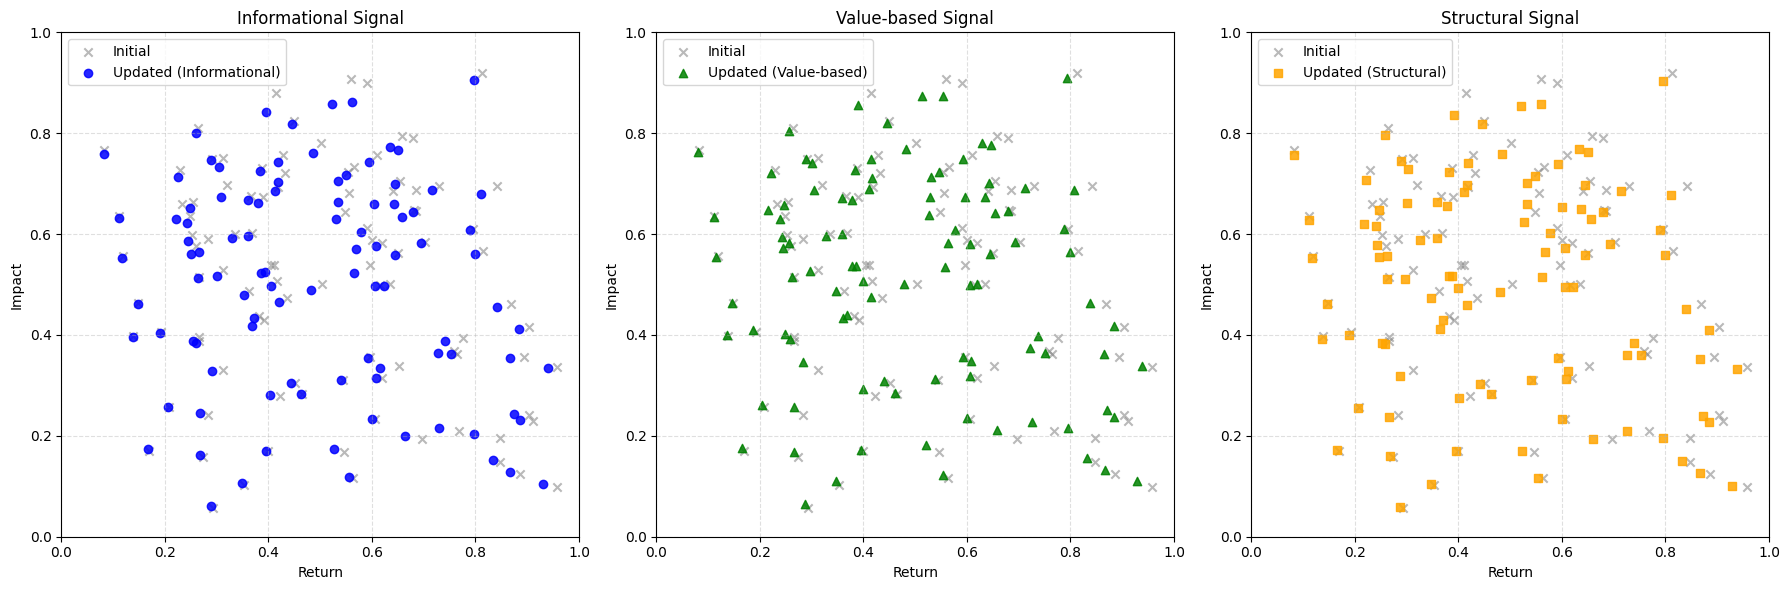

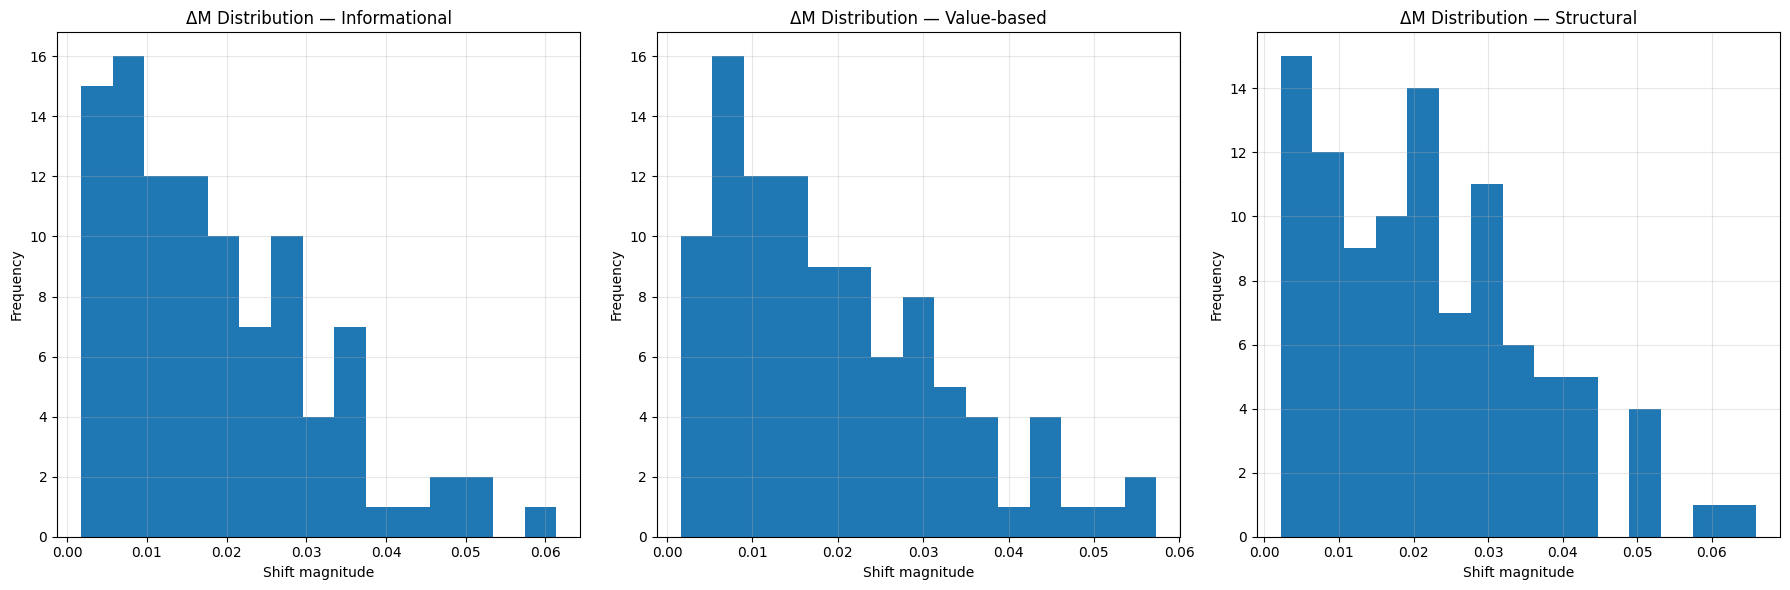

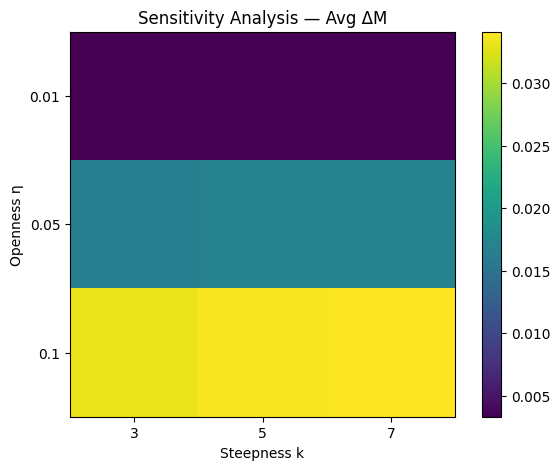

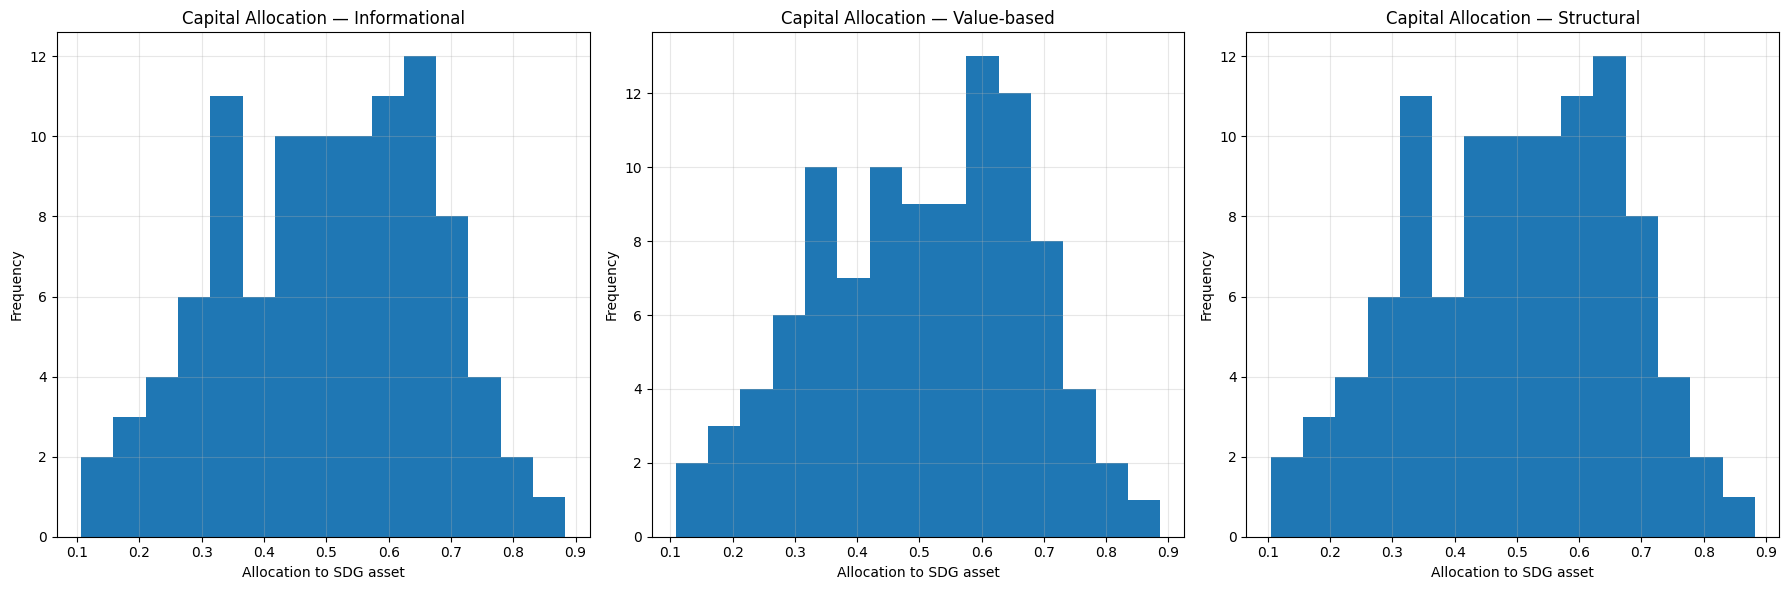

In [ ]:
# ===========================================================
# FULL SWGC SIMULATION PACKAGE
# Scatter plots + ΔM distributions + sensitivity + allocation
# ===========================================================

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 100

# ----------------------------
# 1. Base Parameters
# ----------------------------
ideal_points = np.random.beta(2, 2, size=(N, 2))

delta = np.random.uniform(0.4, 0.9, N)
eta   = np.random.uniform(0.01, 0.1, N)
tau   = np.random.uniform(0.4, 0.6, N)
k     = np.random.uniform(3, 7, N)

signals = {
    "Informational": np.array([0.1, 0.3]),
    "Value-based":   np.array([0.0, 0.5]),
    "Structural":    np.array([0.05, 0.2])
}

# ----------------------------
# 2. SWGC Update Function
# ----------------------------
def update_ideal_point(current, signal, delta_i, eta_i, tau_i, k_i):
    diff = signal - current
    magnitude = eta_i * (1 / (1 + np.exp(-k_i * (np.linalg.norm(diff) - tau_i))))
    updated = current + delta_i * magnitude * (diff / (np.linalg.norm(diff) + 1e-6))
    return np.clip(updated, 0, 1)

# ----------------------------
# 3. Run Simulation
# ----------------------------
results = {}
deltas = {}

for name, sig in signals.items():
    updated = np.zeros_like(ideal_points)
    for i in range(N):
        updated[i] = update_ideal_point(
            ideal_points[i], sig, delta[i], eta[i], tau[i], k[i]
        )
    results[name] = updated
    deltas[name] = np.linalg.norm(updated - ideal_points, axis=1)

# ----------------------------
# 4. Scatter Plots (Option A)
# ----------------------------
colors = {"Informational":"blue","Value-based":"green","Structural":"orange"}
markers = {"Informational":"o","Value-based":"^","Structural":"s"}

fig, axs = plt.subplots(1, 3, figsize=(18,6))

for ax, (label, pts) in zip(axs, results.items()):
    ax.scatter(ideal_points[:,0], ideal_points[:,1],
               c="grey", marker="x", alpha=0.55, label="Initial")

    ax.scatter(pts[:,0], pts[:,1],
               c=colors[label], marker=markers[label],
               alpha=0.85, label=f"Updated ({label})")

    ax.set_title(label + " Signal")
    ax.set_xlim(0,1); ax.set_ylim(0,1)
    ax.set_xlabel("Return"); ax.set_ylabel("Impact")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()

plt.tight_layout()
plt.show()

# ----------------------------
# 5. ΔM Distributions
# ----------------------------
fig, axs = plt.subplots(1, 3, figsize=(18,6))

for ax, label in zip(axs, signals.keys()):
    ax.hist(deltas[label], bins=15)
    ax.set_title(f"ΔM Distribution — {label}")
    ax.set_xlabel("Shift magnitude")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------
# 6. Sensitivity Analysis
# ----------------------------
eta_vals = [0.01, 0.05, 0.1]
k_vals = [3, 5, 7]

heatmap = np.zeros((len(eta_vals), len(k_vals)))

for i, eta_test in enumerate(eta_vals):
    for j, k_test in enumerate(k_vals):
        shifts = []
        for n in range(N):
            upd = update_ideal_point(
                ideal_points[n],
                signals["Value-based"],  # strongest signal
                delta[n],
                eta_test,
                tau[n],
                k_test
            )
            shifts.append(np.linalg.norm(upd - ideal_points[n]))
        heatmap[i,j] = np.mean(shifts)

fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(heatmap)

ax.set_xticks(range(len(k_vals)))
ax.set_yticks(range(len(eta_vals)))
ax.set_xticklabels(k_vals)
ax.set_yticklabels(eta_vals)

ax.set_xlabel("Steepness k")
ax.set_ylabel("Openness η")
ax.set_title("Sensitivity Analysis — Avg ΔM")

plt.colorbar(im, ax=ax)
plt.show()

# ----------------------------
# 7. Capital Reallocation Plots
# ----------------------------
SDG_asset = np.array([0.2, 0.8])

fig, axs = plt.subplots(1, 3, figsize=(18,6))

for ax, (label, pts) in zip(axs, results.items()):
    allocations = pts @ SDG_asset  # dot product

    ax.hist(allocations, bins=15)
    ax.set_title(f"Capital Allocation — {label}")
    ax.set_xlabel("Allocation to SDG asset")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


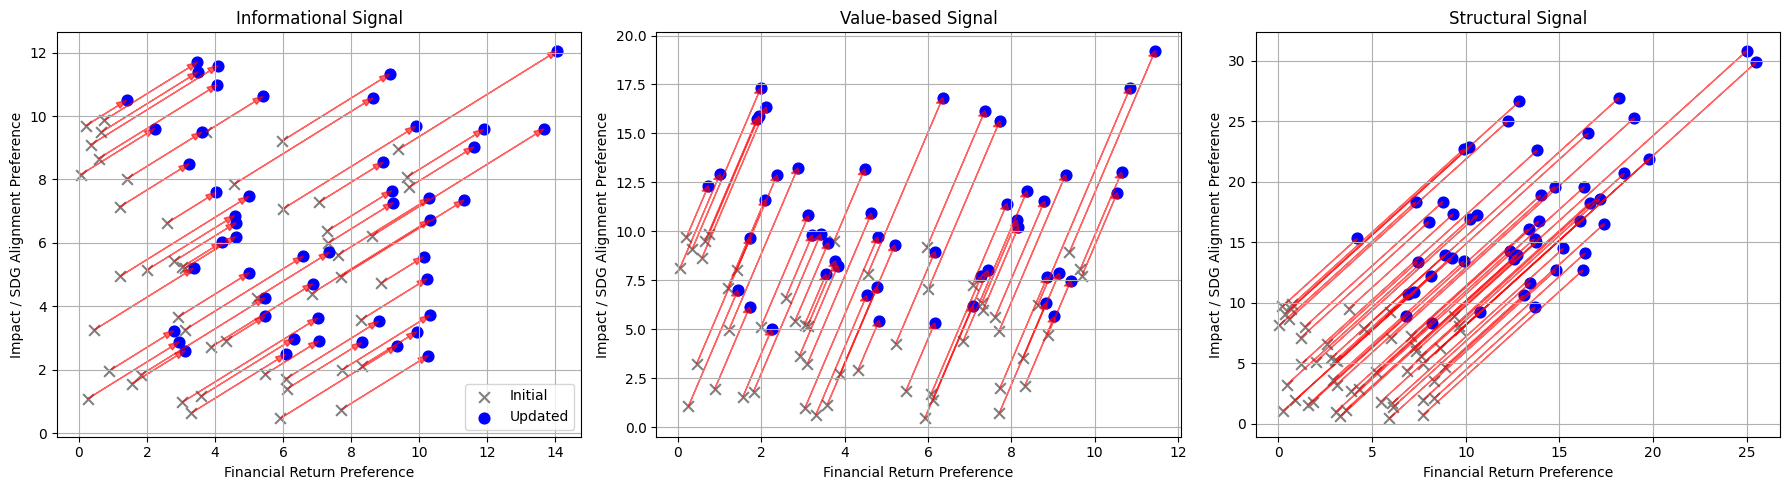

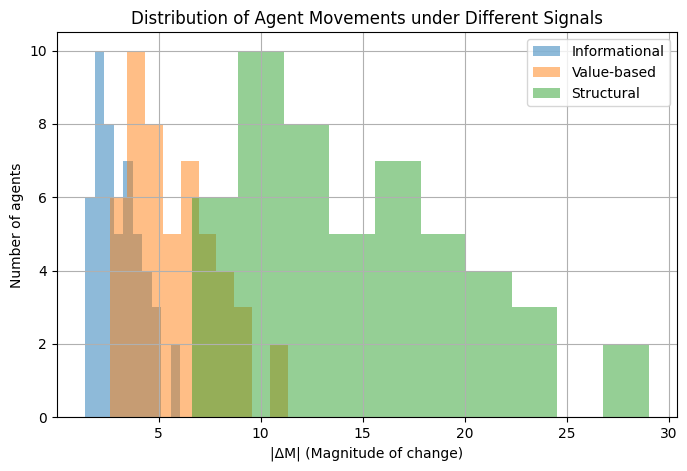

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
n_agents = 50
np.random.seed(42)

# Initial positions: X = return, Y = impact
M_initial = np.random.rand(n_agents, 2) * 10

# Agent psychological parameters
eta = np.random.uniform(0.3, 0.8, n_agents)   # openness
tau = np.random.uniform(0.2, 1.0, n_agents)   # threshold
alpha = 0.8                                   # nonlinear exponent
k = 1.5                                       # dampening factor
salience = np.random.uniform(0.5, 1.2, n_agents)  # salience weight

# Define three different signals
signals = {
    'Informational': np.array([3, 2]),
    'Value-based': np.array([1, 5]),
    'Structural': np.array([5, 7])
}

# -------------------------------
# Enhanced apply_signal() function
# -------------------------------
def apply_signal(M_init, signal, eta, tau, alpha, k, salience):
    delta_M = np.zeros_like(M_init)
    for i in range(M_init.shape[0]):
        norm_signal = np.linalg.norm(signal)
        # Threshold check
        if norm_signal < tau[i]:
            delta_M[i] = np.zeros(2)
        else:
            delta_M[i] = eta[i] * salience[i] * (signal / k) * (norm_signal ** alpha)
    M_updated = M_init + delta_M
    return M_updated, delta_M

# -------------------------------
# Prepare plots
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, (signal_name, signal_vec) in zip(axes, signals.items()):
    M_updated, delta_M = apply_signal(M_initial, signal_vec, eta, tau, alpha, k, salience)

    # Scatter plots
    ax.scatter(M_initial[:,0], M_initial[:,1], color='grey', marker='x', s=60, label='Initial')
    ax.scatter(M_updated[:,0], M_updated[:,1], color='blue', marker='o', s=60, label='Updated')

    # ΔM arrows
    for i in range(n_agents):
        ax.arrow(M_initial[i,0], M_initial[i,1],
                 delta_M[i,0], delta_M[i,1],
                 color='red', alpha=0.6, head_width=0.2, length_includes_head=True)

    ax.set_title(f'{signal_name} Signal')
    ax.set_xlabel('Financial Return Preference')
    ax.set_ylabel('Impact / SDG Alignment Preference')
    ax.grid(True)

axes[0].legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Plot ΔM distributions
# -------------------------------
plt.figure(figsize=(8,5))
for signal_name, signal_vec in signals.items():
    _, delta_M = apply_signal(M_initial, signal_vec, eta, tau, alpha, k, salience)
    delta_norm = np.linalg.norm(delta_M, axis=1)
    plt.hist(delta_norm, bins=10, alpha=0.5, label=signal_name)

plt.xlabel('|ΔM| (Magnitude of change)')
plt.ylabel('Number of agents')
plt.title('Distribution of Agent Movements under Different Signals')
plt.legend()
plt.grid(True)
plt.show()


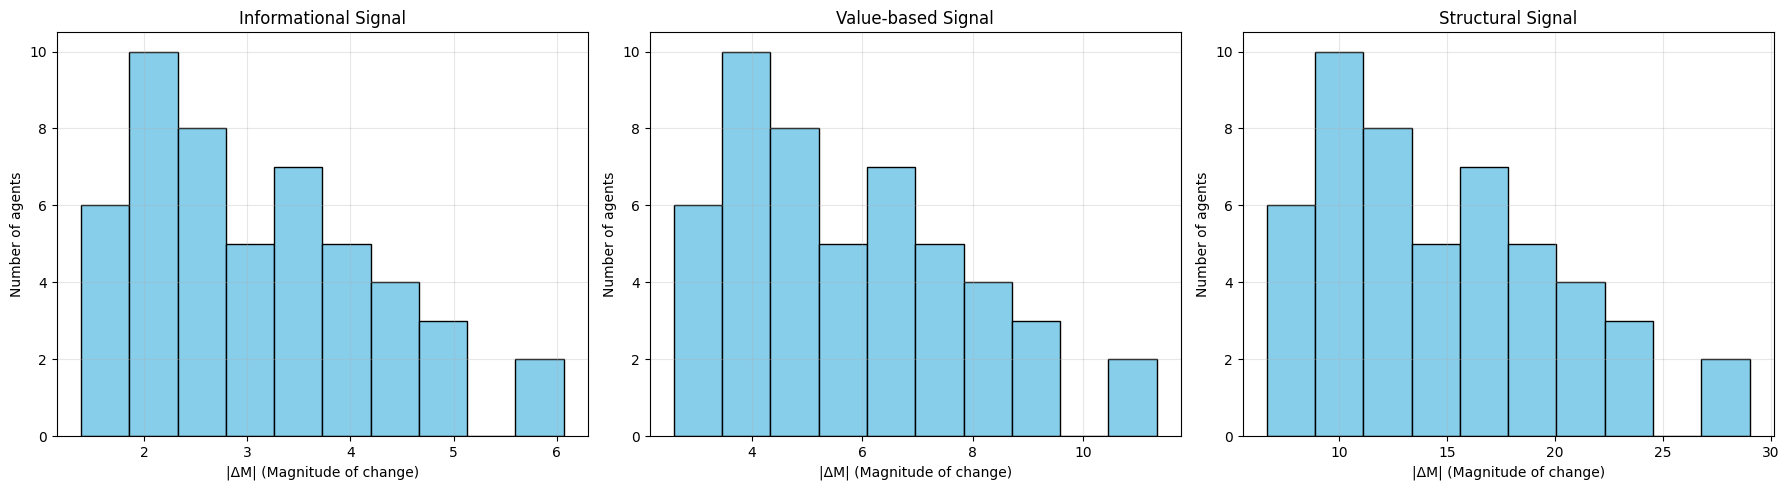

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
n_agents = 50
np.random.seed(42)

# Initial positions
M_initial = np.random.rand(n_agents, 2) * 10

# Agent parameters
eta = np.random.uniform(0.3, 0.8, n_agents)
tau = np.random.uniform(0.2, 1.0, n_agents)
alpha = 0.8
k = 1.5
salience = np.random.uniform(0.5, 1.2, n_agents)

# Signals
signals = {
    'Informational': np.array([3, 2]),
    'Value-based': np.array([1, 5]),
    'Structural': np.array([5, 7])
}

# Enhanced apply_signal()
def apply_signal(M_init, signal, eta, tau, alpha, k, salience):
    delta_M = np.zeros_like(M_init)
    for i in range(M_init.shape[0]):
        norm_signal = np.linalg.norm(signal)
        if norm_signal < tau[i]:
            delta_M[i] = np.zeros(2)
        else:
            delta_M[i] = eta[i] * salience[i] * (signal / k) * (norm_signal ** alpha)
    M_updated = M_init + delta_M
    return M_updated, delta_M

# -------------------------------
# Scatter plots (optional, reuse previous)
# -------------------------------
# You can reuse previous scatter code if needed

# -------------------------------
# ΔM distributions side by side
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, (signal_name, signal_vec) in zip(axes, signals.items()):
    _, delta_M = apply_signal(M_initial, signal_vec, eta, tau, alpha, k, salience)
    delta_norm = np.linalg.norm(delta_M, axis=1)

    ax.hist(delta_norm, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'{signal_name} Signal')
    ax.set_xlabel('|ΔM| (Magnitude of change)')
    ax.set_ylabel('Number of agents')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


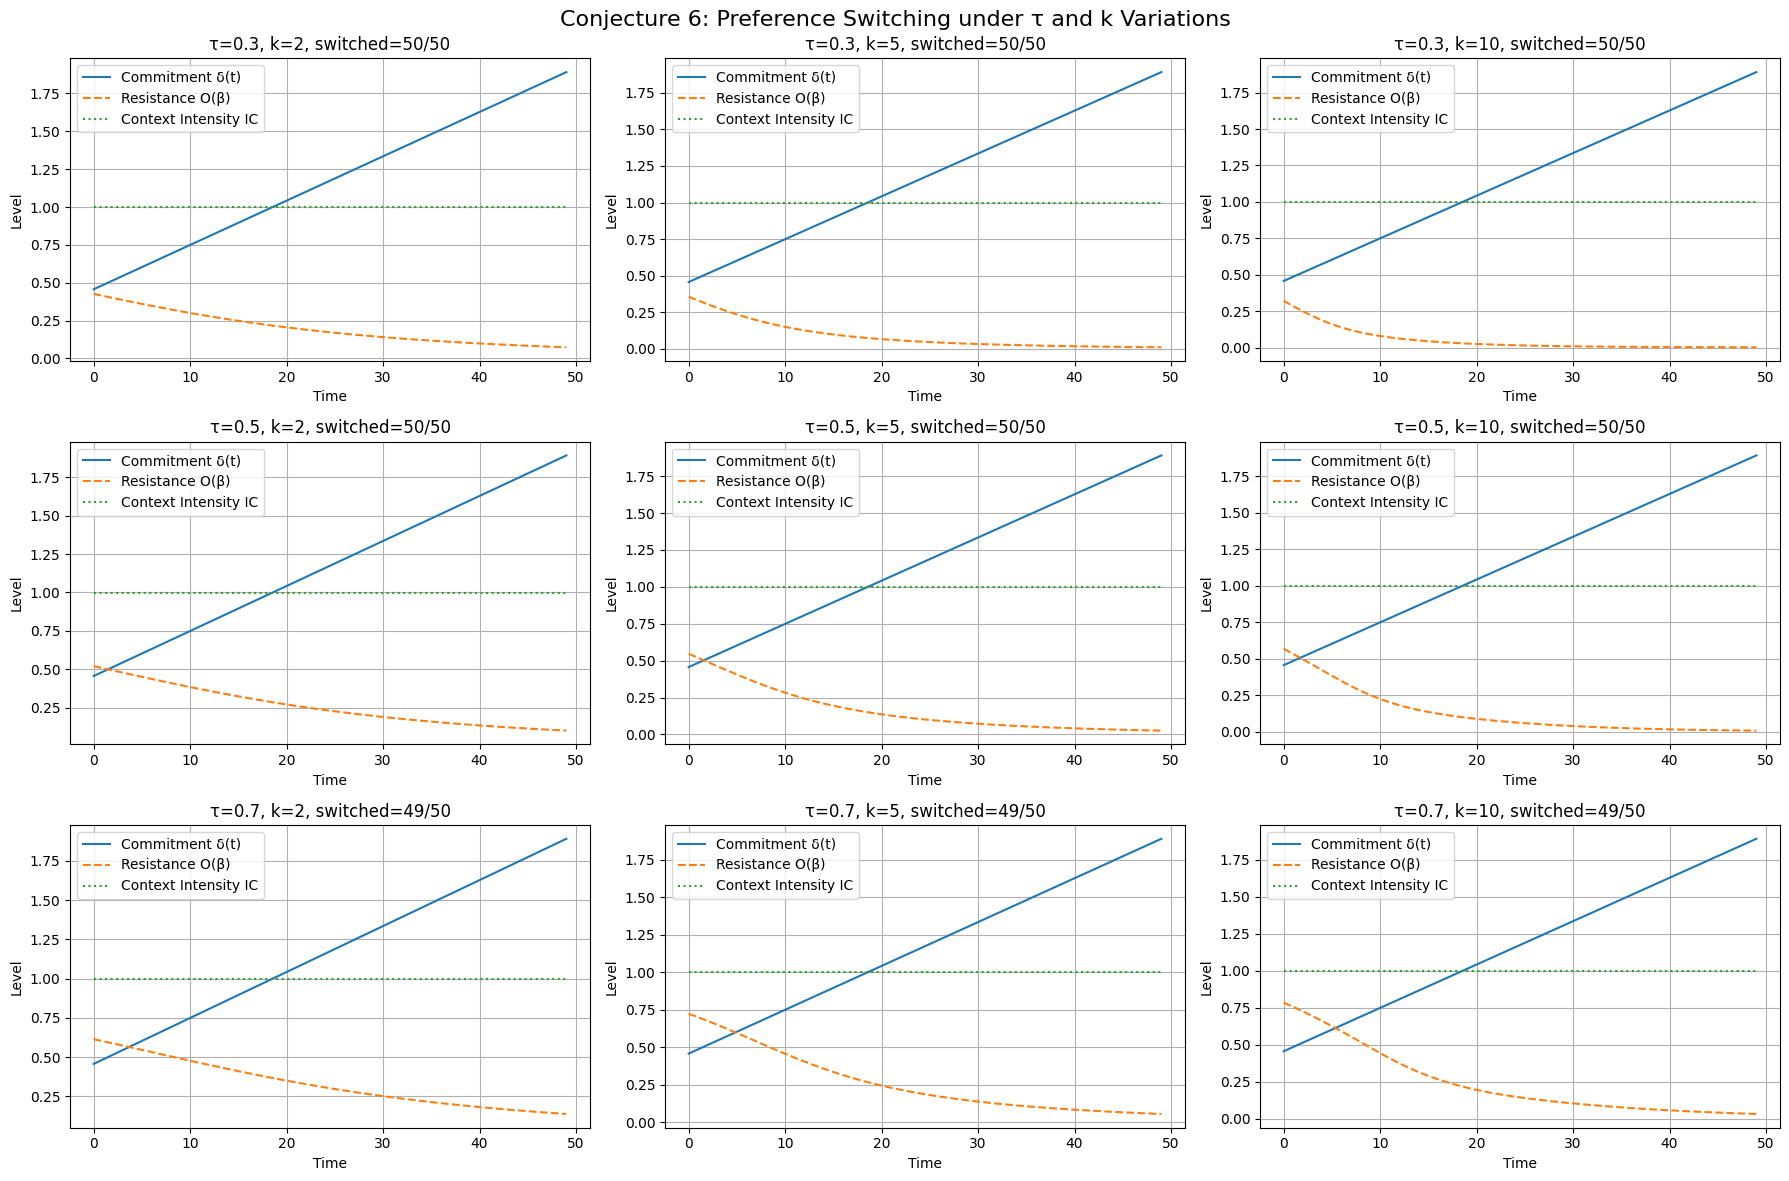

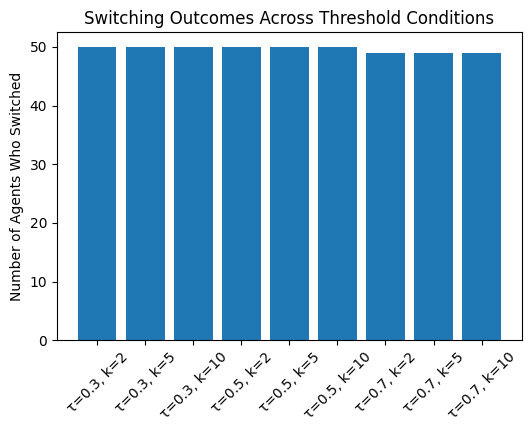

In [ ]:
# --- Conjecture 6 Simulation: Threshold-Based Preference Switching ---
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Simulation Parameters
# -------------------------------
T = 50                                      # time periods
n_agents = 50                               # number of agents
np.random.seed(42)

# Agents' initial commitments δ(0)
delta = np.random.uniform(0.1, 0.9, n_agents)

# Sensitivity of commitment update
eta = np.random.uniform(0.01, 0.05, n_agents)

# Threshold τ and steepness k (CAN BE VARIED)
tau_values = [0.3, 0.5, 0.7]                # weak, medium, strong threshold
k_values = [2, 5, 10]                       # smooth → steep transition

# Create random signal weights and intensities
S = 3                                       # informational, internal, external
omega = np.random.uniform(0.2, 1.0, (n_agents, S))
signal_intensity = np.random.uniform(0.1, 1.0, S)

# -------------------------------
# 2. Helper functions
# -------------------------------

def context_intensity(omega_i, signal_i):
    """Compute context intensity IC for agent i."""
    return np.dot(omega_i, signal_i)

def resistance(delta_i, tau, k):
    """Resistance function O(beta_i)."""
    return 1 / (1 + np.exp(-k * (tau - delta_i)))

def run_simulation(tau, k):
    deltas = np.zeros((T, n_agents))
    resistances = np.zeros((T, n_agents))
    intensity = np.zeros((T, n_agents))
    switched = np.zeros(n_agents, dtype=bool)

    delta_t = delta.copy()

    for t in range(T):
        for i in range(n_agents):
            # Record values
            deltas[t, i] = delta_t[i]
            resistances[t, i] = resistance(delta_t[i], tau, k)
            intensity[t, i] = context_intensity(omega[i], signal_intensity)

            # Switching condition: IC > O
            if intensity[t, i] > resistances[t, i]:
                switched[i] = True

            # Update commitment dynamically
            delta_t[i] += eta[i] * intensity[t, i]

    return deltas, resistances, intensity, switched


# -------------------------------
# 3. Run illustrative scenarios
# -------------------------------
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
plt.suptitle("Conjecture 6: Preference Switching under τ and k Variations", fontsize=16)

for r, tau in enumerate(tau_values):
    for c, k in enumerate(k_values):

        deltas, res, IC, switched = run_simulation(tau, k)

        # Plot average dynamics across agents
        ax = axs[r, c]
        ax.plot(np.mean(deltas, axis=1), label="Commitment δ(t)")
        ax.plot(np.mean(res, axis=1), label="Resistance O(β)", linestyle='--')
        ax.plot(np.mean(IC, axis=1), label="Context Intensity IC", linestyle=':')

        ax.set_title(f"τ={tau}, k={k}, switched={np.sum(switched)}/{n_agents}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Level")
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()

# -------------------------------
# 4. Switching Distribution
# -------------------------------
plt.figure(figsize=(6,4))
switch_count = []
labels = []

for tau in tau_values:
    for k in k_values:
        _, _, _, switched = run_simulation(tau, k)
        switch_count.append(np.sum(switched))
        labels.append(f"τ={tau}, k={k}")

plt.bar(labels, switch_count)
plt.xticks(rotation=45)
plt.ylabel("Number of Agents Who Switched")
plt.title("Switching Outcomes Across Threshold Conditions")
plt.show()


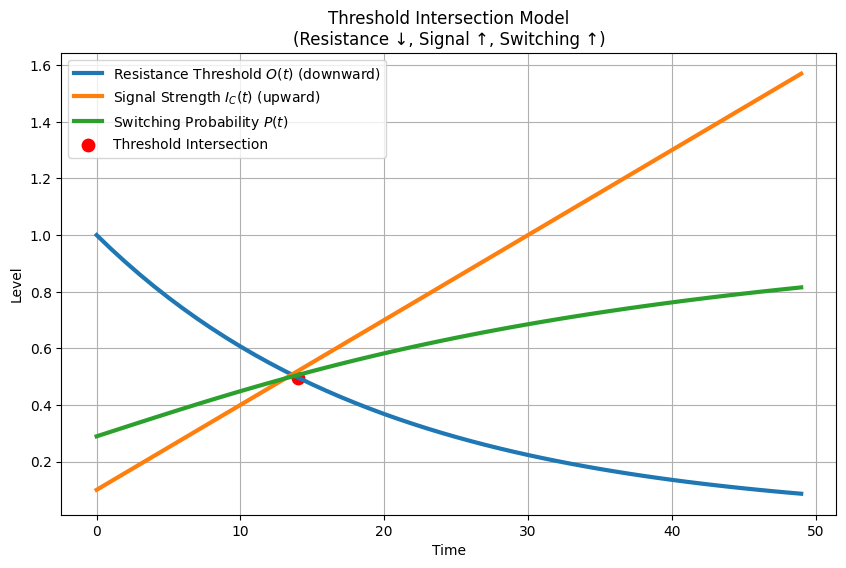

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon
T = 50
t = np.arange(T)

# ----------------------------
# 1. Downward sloping resistance threshold
# ----------------------------
O0 = 1.0            # initial resistance
r = 0.05            # decay rate
O_t = O0 * np.exp(-r * t)   # exponential decline

# ----------------------------
# 2. Upward sloping signal strength
# ----------------------------
I0 = 0.1            # initial signal
g = 0.03            # growth rate
I_t = I0 + g * t    # linear increase

# ----------------------------
# 3. Switching probability
#    P = sigmoid(I - O)
# ----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

P_t = sigmoid(I_t - O_t)

# ----------------------------
# 4. Plotting
# ----------------------------
plt.figure(figsize=(10,6))

plt.plot(t, O_t, label="Resistance Threshold $O(t)$ (downward)", linewidth=3)
plt.plot(t, I_t, label="Signal Strength $I_C(t)$ (upward)", linewidth=3)
plt.plot(t, P_t, label="Switching Probability $P(t)$", linewidth=3)

# Mark intersection point
intersection_index = np.argmin(np.abs(O_t - I_t))
plt.scatter(intersection_index, O_t[intersection_index], color='red', s=80,
            label="Threshold Intersection")

plt.title("Threshold Intersection Model\n(Resistance ↓, Signal ↑, Switching ↑)")
plt.xlabel("Time")
plt.ylabel("Level")
plt.grid(True)
plt.legend()
plt.show()


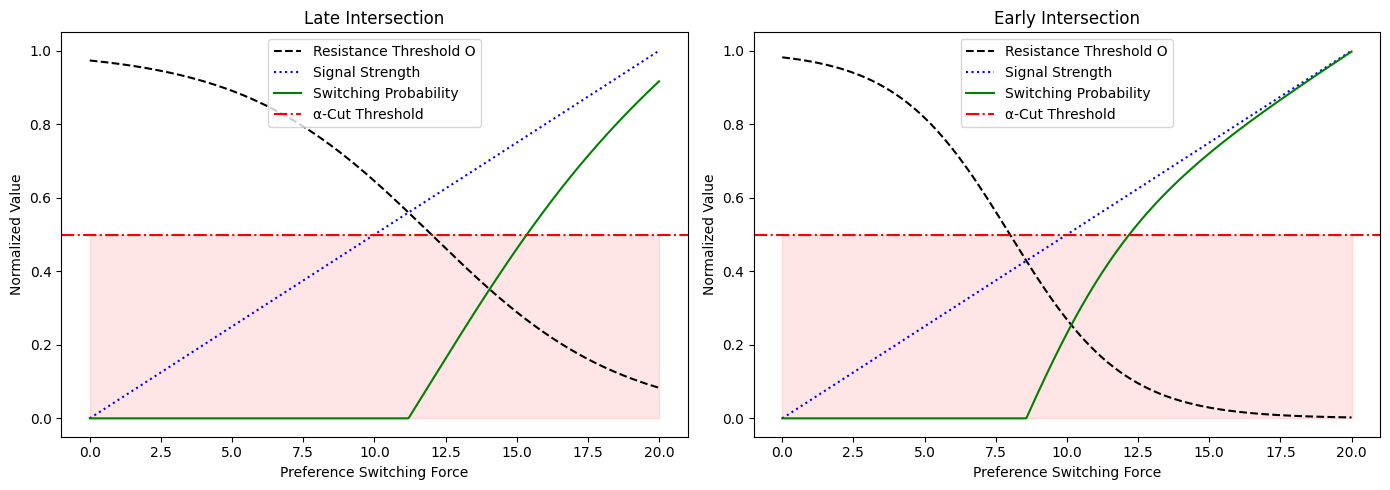

In [ ]:
# Google Colab Script: SWGC Preference Switching with α-Cut

import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
x = np.linspace(0, 20, 500)  # Preference switching force
k = 0.5                       # Steepness of sigmoid
tau = 10                       # Resistance threshold midpoint
alpha = 0.5                    # α-cut threshold (scaled 0-1)
resistance_max = 1.0           # Max resistance value
signal_max = 1.0               # Max signal value

# ---- Functions ----
def resistance(delta, k=0.5, tau=10):
    """Sigmoid resistance threshold function O(beta_i)"""
    return 1 / (1 + np.exp(-k*(tau - delta)))

def switching_probability(signal, resistance):
    """Probability of switching"""
    return np.clip(signal - resistance, 0, 1)

# Scale signal and resistance to [0,1] for plotting
signal_strength = x / max(x)  # Normalized
resistance_late = resistance(x, k=0.3, tau=12)  # Late Intersection
resistance_early = resistance(x, k=0.5, tau=8)  # Early Intersection

# Switching probability (green line)
switch_prob_late = switching_probability(signal_strength, resistance_late)
switch_prob_early = switching_probability(signal_strength, resistance_early)

# ---- Plotting ----
fig, axs = plt.subplots(1,2, figsize=(14,5))

# 1. Late Intersection
axs[0].plot(x, resistance_late, 'k--', label='Resistance Threshold O')
axs[0].plot(x, signal_strength, 'b:', label='Signal Strength')
axs[0].plot(x, switch_prob_late, 'g', label='Switching Probability')
# α-cut line
axs[0].axhline(alpha, color='red', linestyle='-.', label='α-Cut Threshold')
# Shaded area for sub-threshold signals
axs[0].fill_between(x, 0, alpha, color='red', alpha=0.1)
axs[0].set_title('Late Intersection')
axs[0].set_xlabel('Preference Switching Force')
axs[0].set_ylabel('Normalized Value')
axs[0].legend()

# 2. Early Intersection
axs[1].plot(x, resistance_early, 'k--', label='Resistance Threshold O')
axs[1].plot(x, signal_strength, 'b:', label='Signal Strength')
axs[1].plot(x, switch_prob_early, 'g', label='Switching Probability')
# α-cut line
axs[1].axhline(alpha, color='red', linestyle='-.', label='α-Cut Threshold')
# Shaded area for sub-threshold signals
axs[1].fill_between(x, 0, alpha, color='red', alpha=0.1)
axs[1].set_title('Early Intersection')
axs[1].set_xlabel('Preference Switching Force')
axs[1].set_ylabel('Normalized Value')
axs[1].legend()

plt.tight_layout()
plt.show()


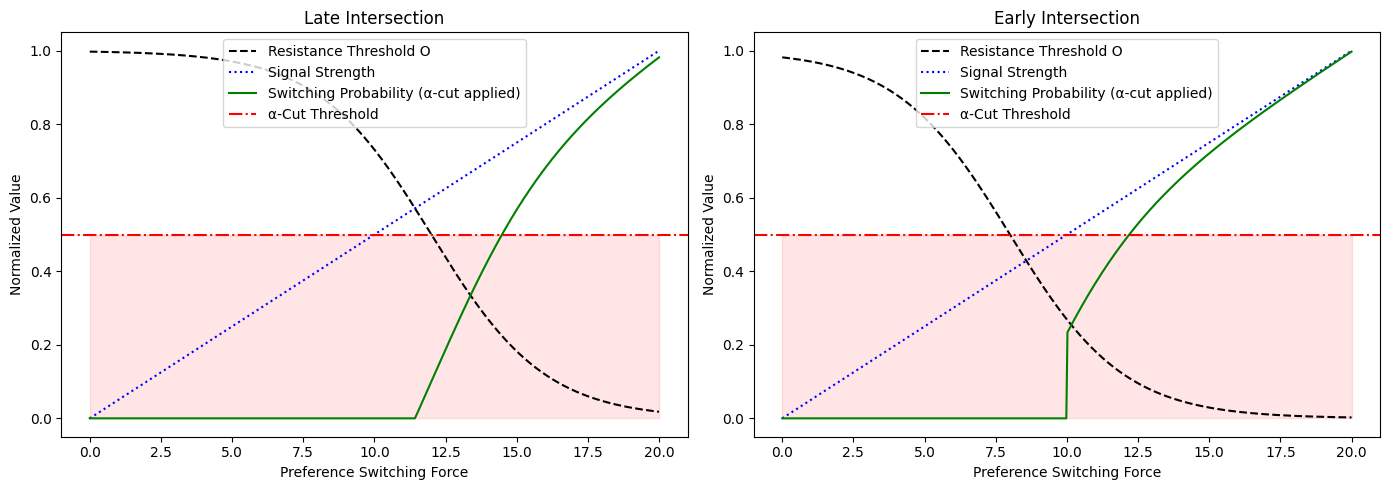

In [ ]:
# Google Colab Script: SWGC Preference Switching with α-Cut affecting switching probability

import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
x = np.linspace(0, 20, 500)  # Preference switching force
k = 0.5                       # Steepness of sigmoid
tau_late = 12                 # Resistance threshold midpoint (Late)
tau_early = 8                 # Resistance threshold midpoint (Early)
alpha = 0.5                    # α-cut threshold (normalized 0-1)

# ---- Functions ----
def resistance(delta, k, tau):
    """Sigmoid resistance threshold function O(beta_i)"""
    return 1 / (1 + np.exp(-k*(tau - delta)))

def switching_probability(signal, resistance, alpha):
    """
    Switching probability considering α-cut:
    Only signals above α contribute
    """
    effective_signal = np.where(signal >= alpha, signal, 0)
    return np.clip(effective_signal - resistance, 0, 1)

# ---- Normalized signal strength ----
signal_strength = x / max(x)  # Normalize to 0-1

# ---- Compute resistance ----
resistance_late = resistance(x, k, tau_late)
resistance_early = resistance(x, k, tau_early)

# ---- Compute switching probability incorporating α-cut ----
switch_prob_late = switching_probability(signal_strength, resistance_late, alpha)
switch_prob_early = switching_probability(signal_strength, resistance_early, alpha)

# ---- Plotting ----
fig, axs = plt.subplots(1,2, figsize=(14,5))

# 1. Late Intersection
axs[0].plot(x, resistance_late, 'k--', label='Resistance Threshold O')
axs[0].plot(x, signal_strength, 'b:', label='Signal Strength')
axs[0].plot(x, switch_prob_late, 'g', label='Switching Probability (α-cut applied)')
axs[0].axhline(alpha, color='red', linestyle='-.', label='α-Cut Threshold')
axs[0].fill_between(x, 0, alpha, color='red', alpha=0.1)
axs[0].set_title('Late Intersection')
axs[0].set_xlabel('Preference Switching Force')
axs[0].set_ylabel('Normalized Value')
axs[0].legend()

# 2. Early Intersection
axs[1].plot(x, resistance_early, 'k--', label='Resistance Threshold O')
axs[1].plot(x, signal_strength, 'b:', label='Signal Strength')
axs[1].plot(x, switch_prob_early, 'g', label='Switching Probability (α-cut applied)')
axs[1].axhline(alpha, color='red', linestyle='-.', label='α-Cut Threshold')
axs[1].fill_between(x, 0, alpha, color='red', alpha=0.1)
axs[1].set_title('Early Intersection')
axs[1].set_xlabel('Preference Switching Force')
axs[1].set_ylabel('Normalized Value')
axs[1].legend()

plt.tight_layout()
plt.show()


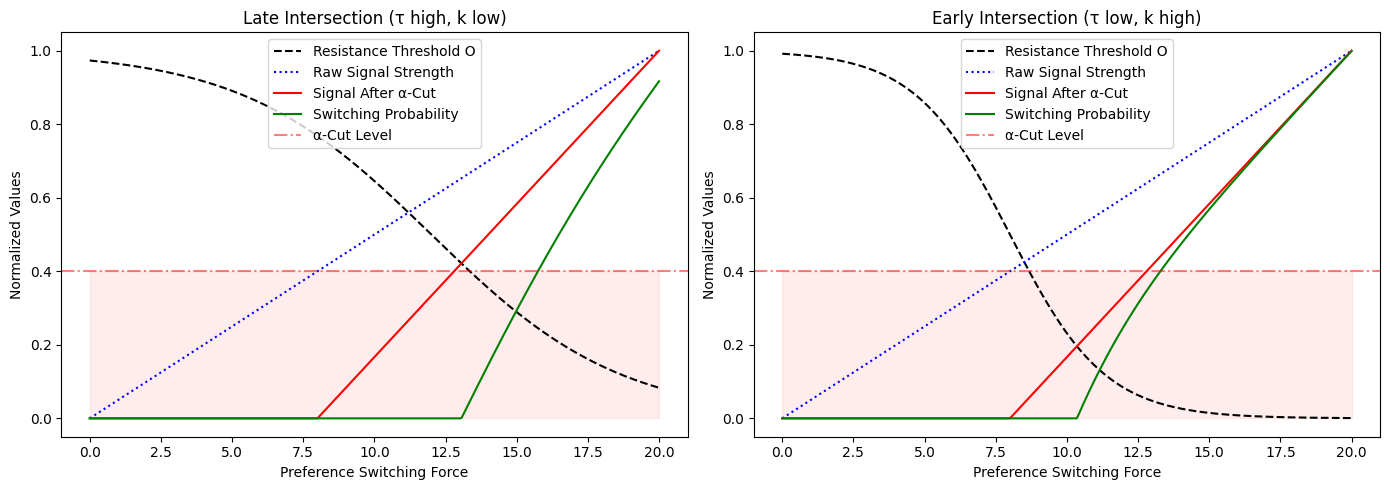

In [ ]:
# Google Colab Script: SWGC Switching With Integrated α-Cut Conditioning

import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
x = np.linspace(0, 20, 500)      # Preference switching force
k_late = 0.3                     # Steepness for late intersection
k_early = 0.6                    # Steepness for early intersection
tau_late = 12                    # Threshold location (late)
tau_early = 8                    # Threshold location (early)
alpha = 0.4                      # α-cut threshold (0–1)

# -----------------------
# Core SWGC Functions
# -----------------------

def resistance(delta, k, tau):
    """
    Sigmoid resistance threshold O(beta_i)
    """
    return 1 / (1 + np.exp(-k * (tau - delta)))

def apply_alpha_cut(signal, alpha):
    """
    Implements α-cut conditioning:
    if signal < α, ignore (set to 0);
    if signal ≥ α, rescale to (0,1].
    """
    signal = np.clip(signal, 0, 1)
    adjusted = np.where(signal < alpha, 0, (signal - alpha) / (1 - alpha))
    return adjusted

def switching_probability(signal_alpha, resistance):
    """
    Switching probability after α-cut conditioning:
    P = max(signal_alpha - resistance, 0)
    """
    return np.clip(signal_alpha - resistance, 0, 1)

# -----------------------
# Generate Normalized Signal
# -----------------------
signal_norm = x / max(x)

# Apply α-cut
signal_alpha = apply_alpha_cut(signal_norm, alpha)

# -----------------------
# Compute Resistance & Switching for Late vs Early intersection
# -----------------------
res_late = resistance(x, k_late, tau_late)
res_early = resistance(x, k_early, tau_early)

switch_late = switching_probability(signal_alpha, res_late)
switch_early = switching_probability(signal_alpha, res_early)

# -----------------------
# Plotting
# -----------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ---- LATE INTERSECTION ----
axs[0].plot(x, res_late, 'k--', label='Resistance Threshold O')
axs[0].plot(x, signal_norm, 'b:', label='Raw Signal Strength')
axs[0].plot(x, signal_alpha, 'r', label='Signal After α-Cut')
axs[0].plot(x, switch_late, 'g', label='Switching Probability')
axs[0].axhline(alpha, color='red', linestyle='-.', alpha=0.5, label='α-Cut Level')

axs[0].fill_between(x, 0, alpha, color='red', alpha=0.07)
axs[0].set_title("Late Intersection (τ high, k low)")
axs[0].set_xlabel("Preference Switching Force")
axs[0].set_ylabel("Normalized Values")
axs[0].legend()

# ---- EARLY INTERSECTION ----
axs[1].plot(x, res_early, 'k--', label='Resistance Threshold O')
axs[1].plot(x, signal_norm, 'b:', label='Raw Signal Strength')
axs[1].plot(x, signal_alpha, 'r', label='Signal After α-Cut')
axs[1].plot(x, switch_early, 'g', label='Switching Probability')
axs[1].axhline(alpha, color='red', linestyle='-.', alpha=0.5, label='α-Cut Level')

axs[1].fill_between(x, 0, alpha, color='red', alpha=0.07)
axs[1].set_title("Early Intersection (τ low, k high)")
axs[1].set_xlabel("Preference Switching Force")
axs[1].set_ylabel("Normalized Values")
axs[1].legend()

plt.tight_layout()
plt.show()
